# Market Segmentation 📈📊🏛️💸💲

### * Marketing is crucial for the growth and sustainability of any business.
### * Marketers can help build the company’s brand, engage customers, grow revenue, and increase sales.
##  * GROWTH (Marketers empower business growth by reaching new customers)
##  * EDUCATION (Marketers educare and communicate value proposition to customers)
##  * DRIVE SALES (Marketers drive sales and traffic to products/services)
##  * ENGAGEMENT (Marketers engage customers and understand their needs)

### * One of the key pain points for marketers is to know their customers and identify their needs.
### * By understanding the customer,marketers can launch a targeted marketing campaign that is tailored for specific  needs.
### * If Idea about the customers is avilable, data science can be applied to perform market segmentation.
### * In this case study, you have been hired as a consultant to a bank in New York City.
### * The bank has extensive data on their customers for the past 6 months.
### * The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups.

------------------------------------------------------------------------------------

# IMPORT LIBRARIES AND DATASETS

### This need to execute in tensor flow environment 

#### Import Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Check Current Directory 

In [25]:
os.getcwd()

'C:\\Users\\HP'

#### Change the directory 

In [30]:
os.chdir('C:\\Users\\HP\\Downloads\\Prajwal Ghotkar Data Project\\Project -5 Marketting Department\\')
os.getcwd()

'C:\\Users\\HP\\Downloads\\Prajwal Ghotkar Data Project\\Project -5 Marketting Department'

#### Read Sales Data, display top 5 records

In [33]:
creditcard_df = pd.read_csv('Marketing_data.csv')
display (creditcard_df )

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in instalment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

#### Data Set Details - Info

In [39]:
creditcard_df.info()
# 18 features with 8950 points  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### Data Set Details – Describe

##### Mean balance is $1564 

##### Balance frequency is frequently updated on average ~0.9

##### Purchases average is $1000

##### one off purchase average is ~$600

##### Average purchases frequency is around 0.5

##### average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low

##### Average credit limit ~ 4500

##### Percent of full payment is 15%

##### Average tenure is 11 years

In [57]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

#### Customer with maximum 'ONEOFF_PURCHASES' 

##### Check who made one off purchase of $40761 ie maximum ONEOFF_PURCHASES 

In [49]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

#### Customer with maximum Cash Advance

In [52]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

##### Check who made cash advance of $47137
##### This customer made 123 cash advance transactions
##### Never paid credit card in full

In [55]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

# VISUALIZE AND EXPLORE DATASET

#### Check missing values 
##### Check for missing Data 

In [64]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

##### Heat map for missing data  

<Axes: >

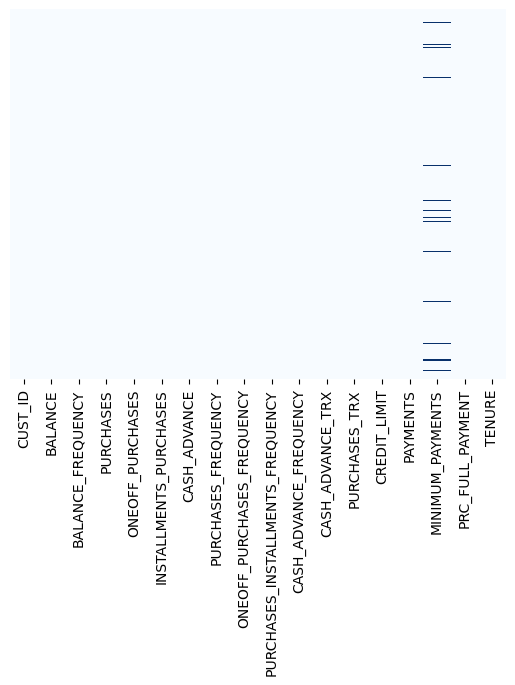

In [67]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

#### Fill the missing values - Column MINIMUM_PAYMENTS and CREDIT_LIMIT

##### Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 

In [74]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

##### Fill up the missing elements with mean of the 'CREDIT_LIMIT' 

In [77]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

#### Check missing values 

In [80]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Missing values Heatmap 

<Axes: >

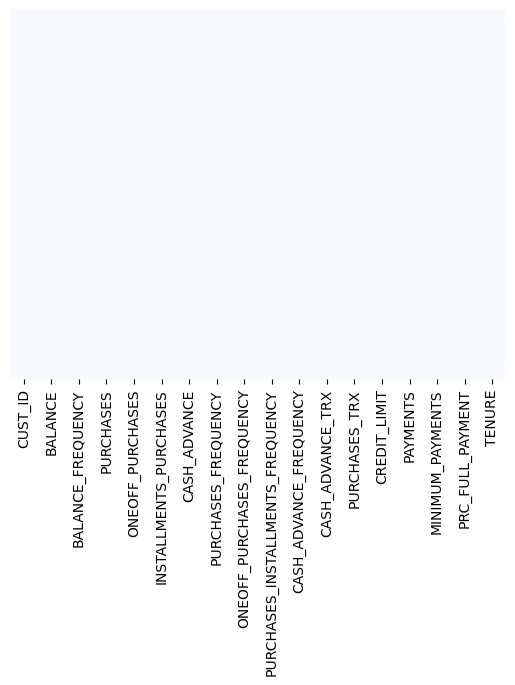

In [83]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

#### Check for Duplicate Data 

##### Check for duplicated entries in the data

In [87]:
creditcard_df.duplicated().sum()

0

#### Drop customer id column  

##### Drop Customer ID since it has no meaning here 

In [91]:
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)
display(creditcard_df)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

#### Number of Columns 

In [94]:
n = len(creditcard_df.columns)
display(n)

17

#### Display Column Names 

In [97]:
display (creditcard_df.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

#### Create dist plot 

##### distplot combines the matplotlib.hist function with seaborn kdeplot()

##### KDE Plot represents the Kernel Density Estimate

##### KDE is used for visualizing the Probability Density of a continuous variable.

##### KDE demonstrates the probability density at different values in a continuous variable. 

##### Mean of balance is $1500

##### 'Balance_Frequency' for most customers is updated frequently ~1

##### For 'PURCHASES_FREQUENCY', there are two distinct group of customers

##### For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently

##### Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0

##### Credit limit average is around $4500

##### Most customers are ~11 years tenure


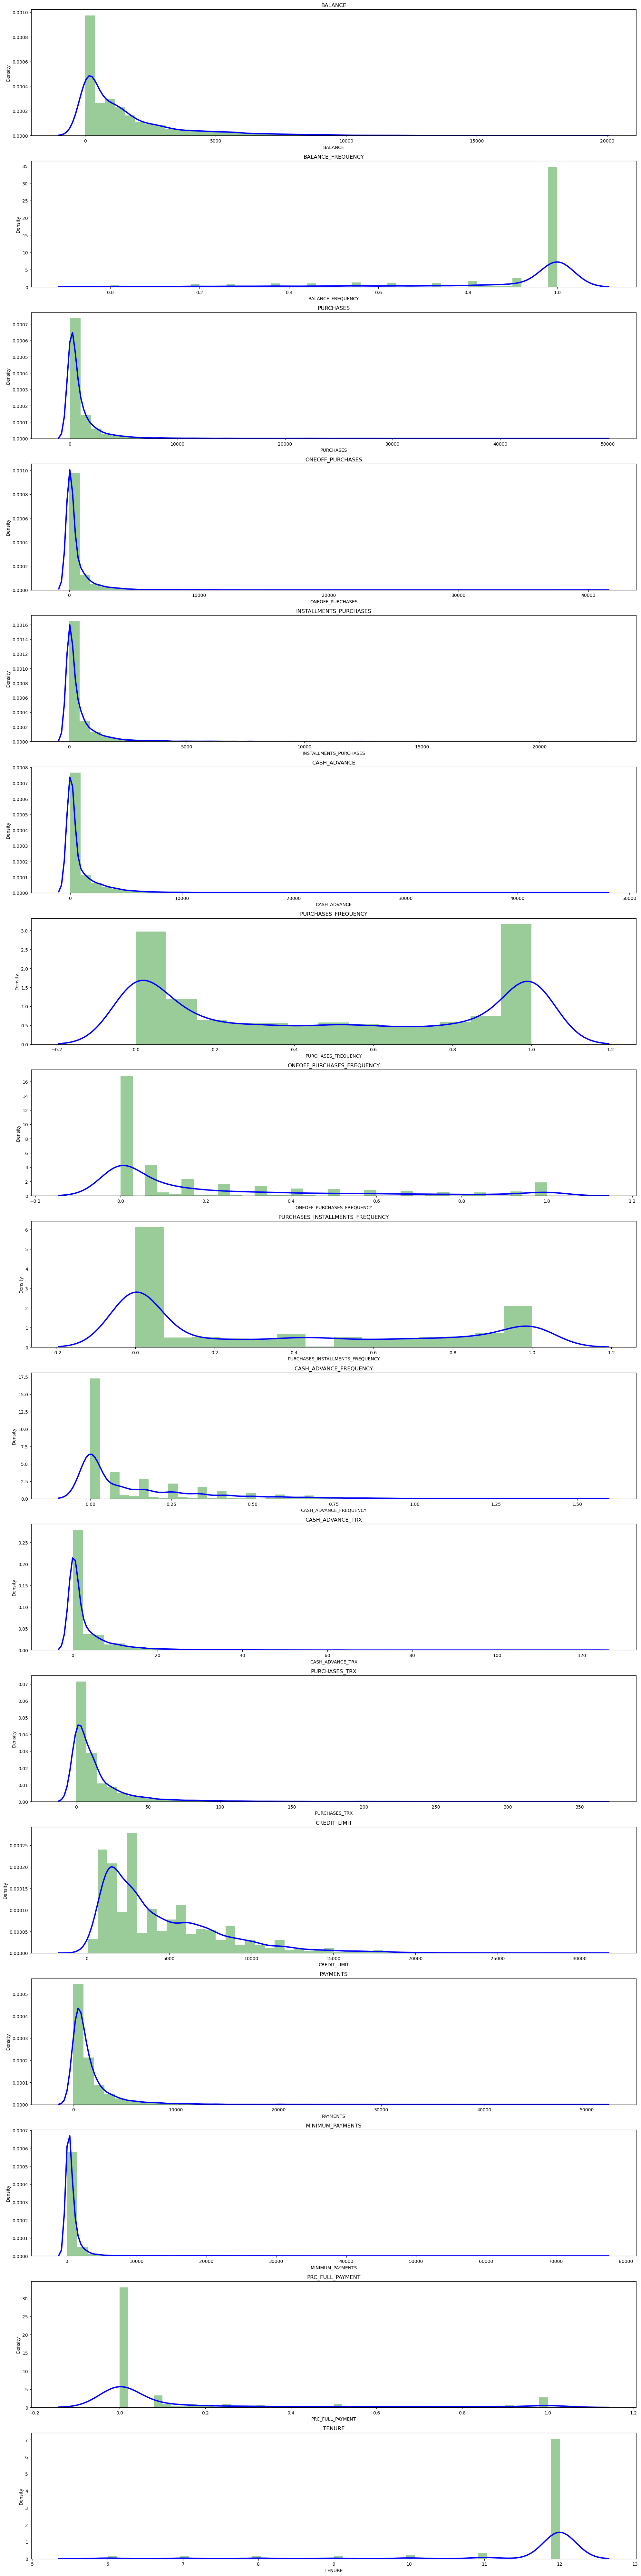

In [101]:
plt.figure(figsize=(20,80))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

#### Create Pair Plot  

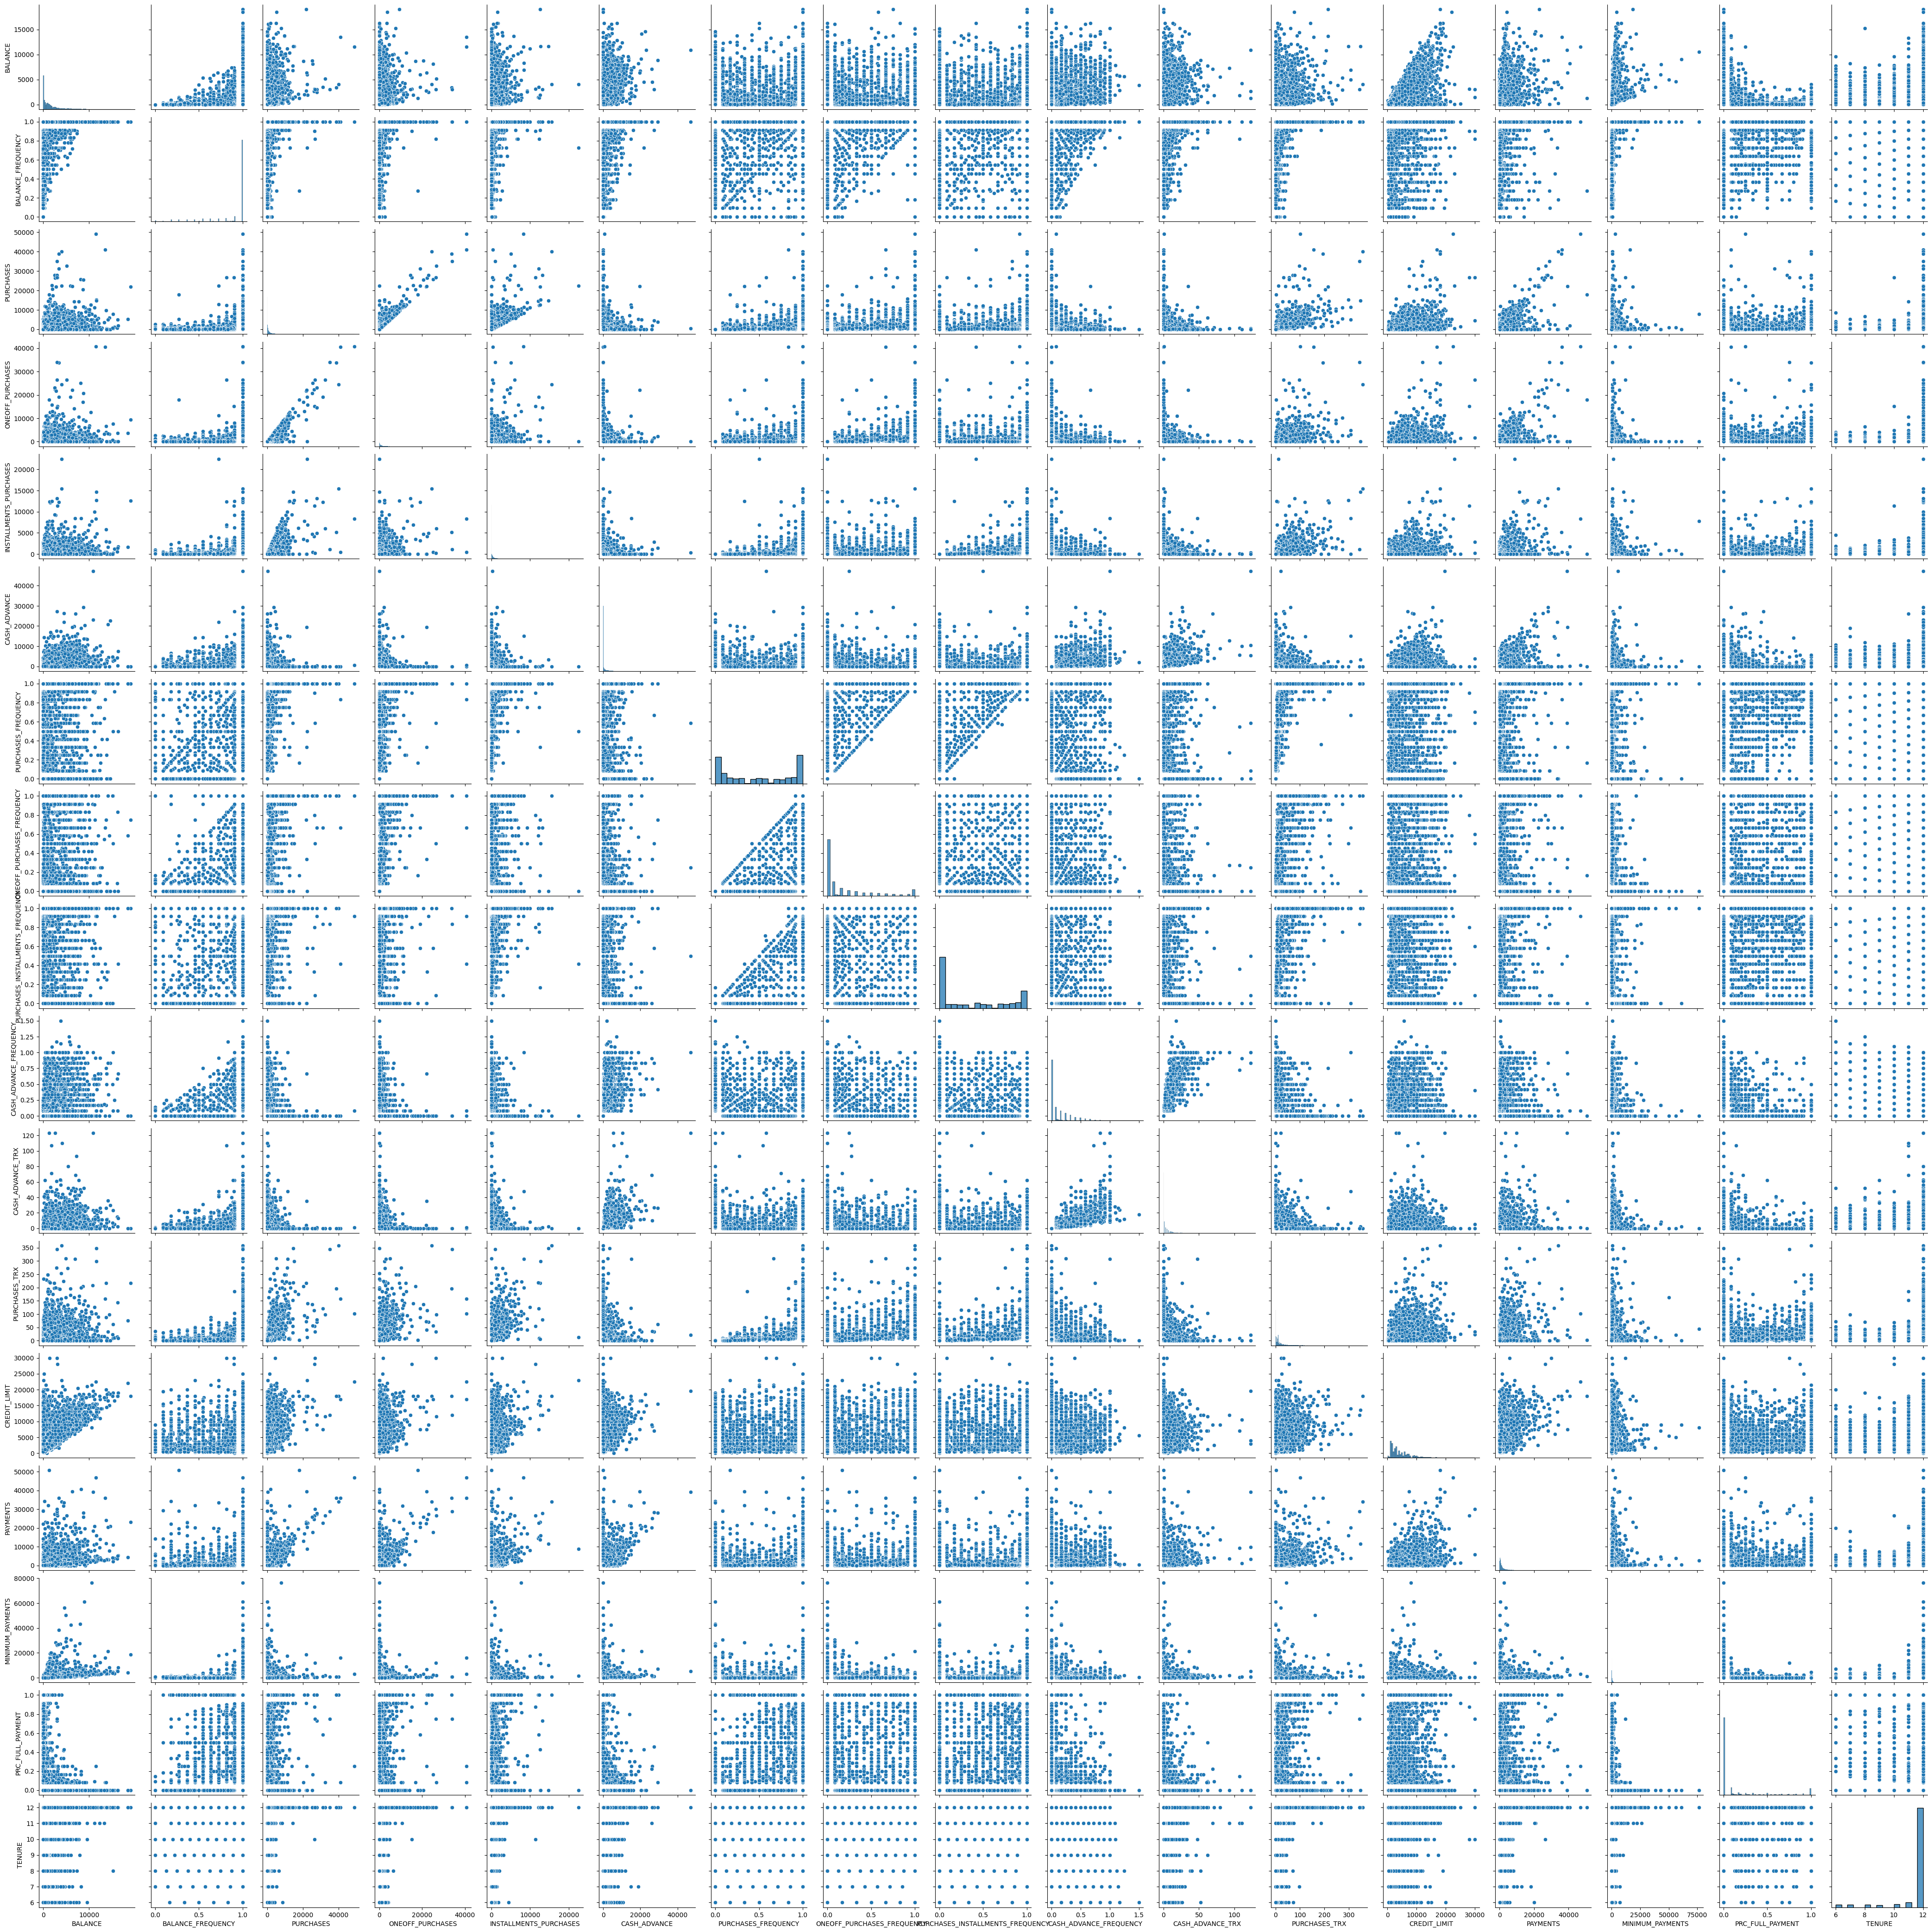

In [104]:
sns.pairplot(creditcard_df)

##### Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
##### Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

#### Display Co relation Matrix 

In [109]:
correlations = creditcard_df.corr()
display (correlations )

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

#### Create Heat Map 

<Axes: >

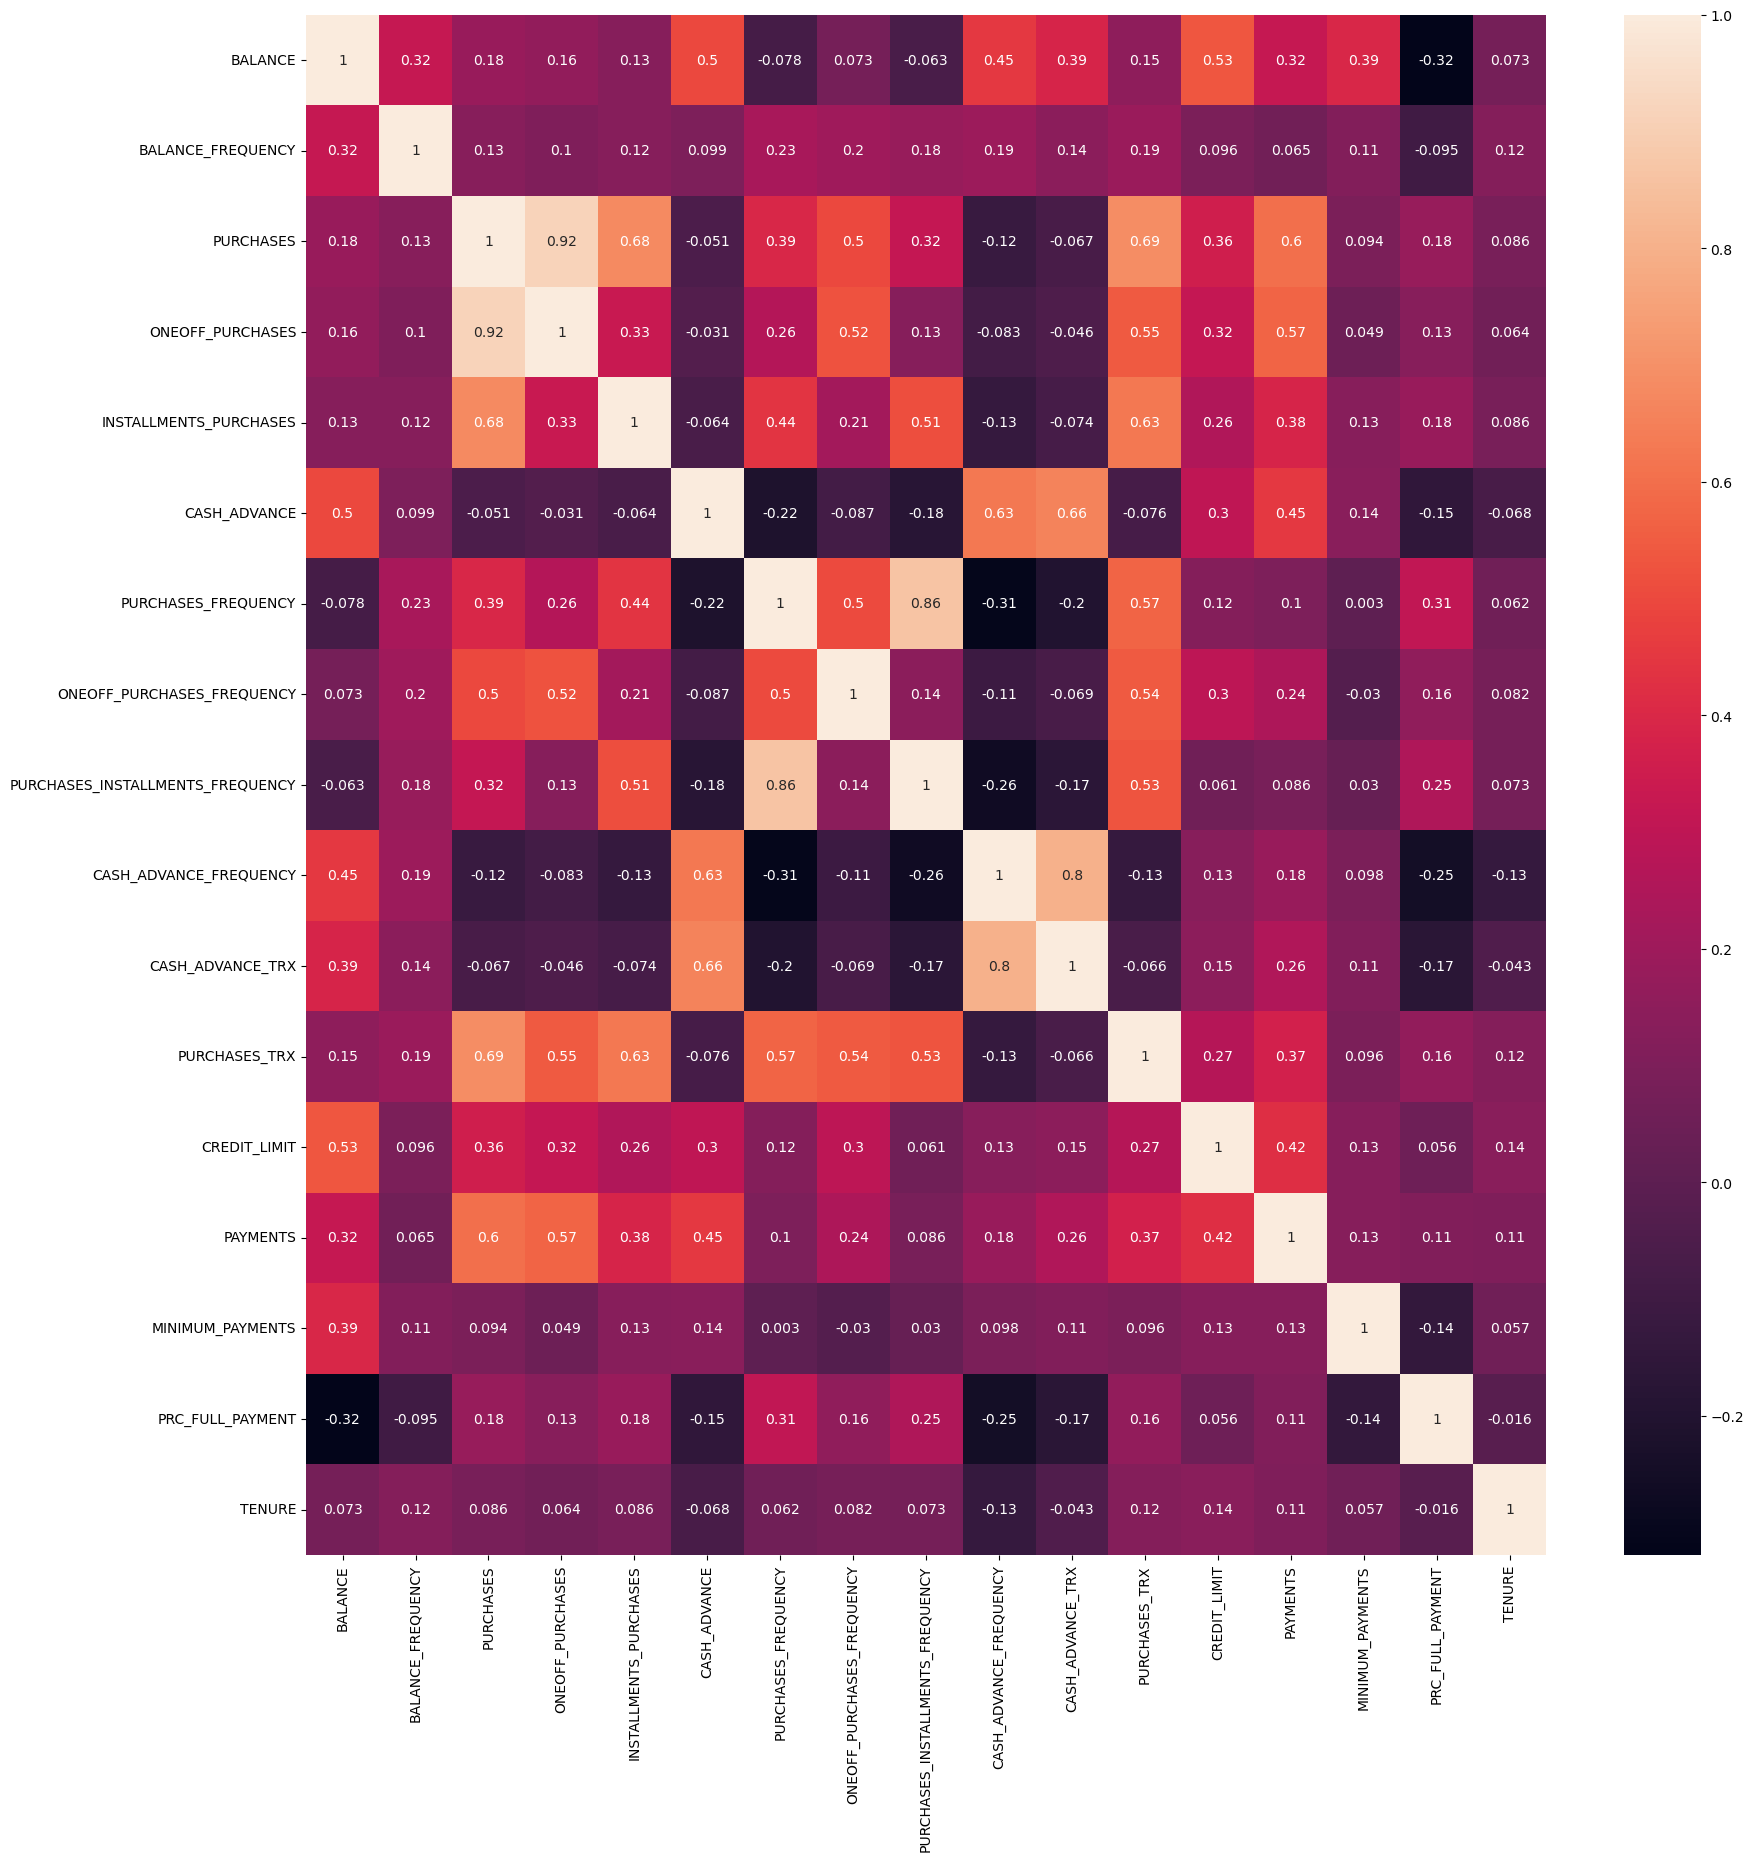

In [112]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

##### 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
##### Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'  

# OPTIMAL NUMBER OF CLUSTERS 

#### Display the Data Set 

In [117]:
display (creditcard_df)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

#### Standardise the Data 

##### Let's scale the data first

In [123]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

#### Display the Shape

In [126]:
creditcard_df_scaled.shape  

(8950, 17)

#### Display Standardised Data Set 

In [129]:
display(pd.DataFrame(creditcard_df_scaled))

0         1         2         3         4         5         6   \
0    -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1     0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2     0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3     0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4    -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.737950  0.518084 -0.333293 -0.356934 -0.132643 -0.466786  1.269843   
8946 -0.742423  0.518084 -0.329136 -0.356934 -0.122823 -0.466786  1.269843   
8947 -0.740398 -0.185477 -0.401965 -0.356934 -0.294893 -0.466786  0.854576   
8948 -0.745174 -0.185477 -0.469552 -0.356934 -0.454576 -0.449352 -1.221758   
8949 -0.572575 -0.889033  0.042146  0.301732 -0.454576 -0.406205  0.439310   

            7         8         9         10        11        12        13  \
0    -0.678661 -0.707313 -0.675349 -0.476070 -0.511333 -0.960433 -0.528979   
1    -0.678661 -0.916995  0.573963  0.110074 -0.591796  0.688639  0.818642   
2     2.673451 -0.916995 -0.675349 -0.476070 -0.109020  0.826062 -0.383805   
3    -0.399319 -0.916995 -0.258913 -0.329534 -0.551565  0.826062 -0.598688   
4    -0.399319 -0.916995 -0.675349 -0.476070 -0.551565 -0.905464 -0.364368   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.486217   
8946 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.503396   
8947 -0.678661  0.760469 -0.675349 -0.476070 -0.390639 -0.960433 -0.570615   
8948 -0.678661 -0.916995  0.157527 -0.182998 -0.591796 -1.097856 -0.580536   
8949  1.556082 -0.916995  0.990398 -0.182998  0.333524 -0.905464 -0.576869   

                14        15        16  
0    -3.109675e-01 -0.525551  0.360680  
1     8.931021e-02  0.234227  0.360680  
2    -1.016632e-01 -0.525551  0.360680  
3     4.878305e-17 -0.525551  0.360680  
4    -2.657913e-01 -0.525551  0.360680  
...            ...       ...       ...  
8945 -3.498541e-01  1.183951 -4.122768  
8946  4.878305e-17 -0.525551 -4.122768  
8947 -3.354655e-01  0.329200 -4.122768  
8948 -3.469065e-01  0.329200 -4.122768  
8949 -3.329464e-01 -0.525551 -4.122768  

[8950 rows x 17 columns]

#### Create Elbow Graph  

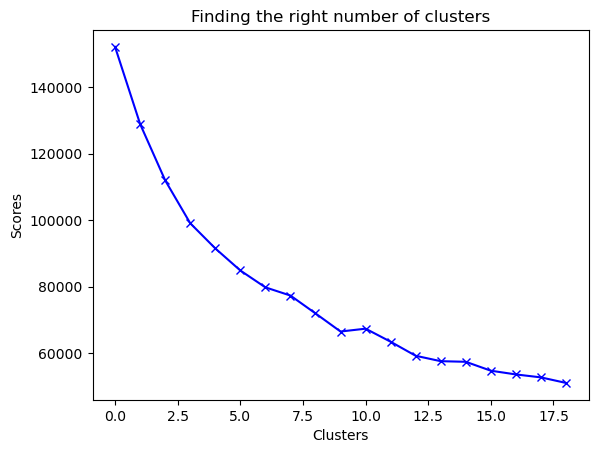

In [132]:
scores_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

##### From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
##### However, the values does not reduce linearly until 8th cluster. 
##### Let's choose the number of clusters to be 7.

#### APPLY K -Means 

In [138]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

#### Number of Clusters 

In [141]:
kmeans.cluster_centers_.shape

(8, 17)

#### Cluster Canters

In [146]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
display(cluster_centers)   

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0  1.753032          0.336565   0.005469         0.014370   
1 -0.404503          0.307162  -0.058353        -0.256274   
2  1.306643          0.375538  -0.304097        -0.219891   
3  1.041912          0.465155   2.494838         1.801152   
4 -0.145600          0.392859   0.541864         0.662638   
5 -0.698666         -2.147632  -0.318246        -0.237478   
6  1.845310          0.340595  12.297201        12.823670   
7 -0.118654          0.368103  -0.351687        -0.234794   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.013788     3.990138           -0.232236   
1               0.332808    -0.365377            0.999579   
2              -0.315104     1.122815           -0.628202   
3               2.589997    -0.164161            1.162760   
4               0.063649    -0.331293            0.984699   
5              -0.316096    -0.308739           -0.565248   
6               5.516158     0.272530            1.043177   
7              -0.400082    -0.171034           -0.831573   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.042031                        -0.189092   
1                  -0.410240                         1.195853   
2                  -0.324143                        -0.543926   
3                   1.549603                         1.268890   
4                   1.872132                         0.206767   
5                  -0.438183                        -0.457351   
6                   2.145028                         0.896761   
7                  -0.372127                        -0.751588   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               2.560299         3.729511     -0.008040     1.286496   
1              -0.473178        -0.363972      0.146417    -0.324043   
2               1.506715         1.111554     -0.378916     0.673462   
3              -0.285944        -0.174354      3.116944     1.289902   
4              -0.411412        -0.334565      0.624019     0.426528   
5              -0.484439        -0.361831     -0.428113    -0.212061   
6              -0.380373        -0.109730      4.556136     3.185151   
7               0.000659        -0.116171     -0.477785    -0.408253   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  2.623705         0.549754        -0.198103  0.050574  
1 -0.243793        -0.069664         0.376857 -0.031455  
2  0.169748         0.487436        -0.448007 -0.173442  
3  1.389500         0.594124         0.248930  0.337591  
4  0.142150        -0.163696         0.434879  0.205459  
5 -0.224704        -0.254829         0.256124 -0.160178  
6  9.047799         1.030898         1.222264  0.298409  
7 -0.295056        -0.086417        -0.451399  0.034163

#### Inverse Transformation- Convert to original Data

##### In order to understand what these numbers mean, perform inverse transformation

In [150]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
display(cluster_centers)

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  5213.263237          0.957000   1014.888600       616.288850   
1   722.536023          0.950035    878.533332       167.075054   
2  4284.142350          0.966232    353.496838       227.463711   
3  3733.127593          0.987462   6333.464944      3581.980506   
4  1261.420248          0.970335   2160.906335      1692.281536   
5   110.260827          0.368516    323.267625       198.273053   
6  5405.330935          0.957955  27276.363750     21877.102917   
7  1317.506793          0.964471    251.821070       202.728025   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             398.599750  9346.376007            0.397143   
1             712.021411   212.657436            0.891530   
2             126.123180  3333.466578            0.238223   
3            2753.169831   634.617398            0.957022   
4             468.624798   284.134095            0.885558   
5             125.225724   331.430966            0.263489   
6            5399.260833  1550.378389            0.909028   
7              49.278186   620.205734            0.156600   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.214996                         0.289288   
1                   0.080075                         0.839700   
2                   0.105759                         0.148267   
3                   0.664734                         0.868727   
4                   0.760951                         0.446612   
5                   0.071739                         0.182674   
6                   0.842361                         0.720833   
7                   0.091445                         0.065737   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.647486        28.700000     14.510000   9175.250000   
1               0.040456         0.764983     18.349221   3315.449922   
2               0.436653        10.834367      5.291408   6944.778162   
3               0.077924         2.058989     92.185393   9187.640449   
4               0.052816         0.965665     30.220601   6046.333984   
5               0.038203         0.779595      4.068536   3722.884653   
6               0.059028         2.500000    127.958333  16083.333333   
7               0.135276         2.456042      2.833895   3009.059733   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   9328.513060      2145.384497         0.095773  11.585000  
1   1027.386874       701.858456         0.263939  11.475224  
2   2224.549052      2000.154567         0.022680  11.285208  
3   5755.608918      2248.787373         0.226522  11.969101  
4   2144.653552       482.719966         0.280909  11.792275  
5   1082.649080       270.337670         0.228627  11.302960  
6  27925.634496      3266.671038         0.511206  11.916667  
7    878.986678       662.816439         0.021688  11.563038

##### First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
##### Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
##### Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
##### Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance

#### Display Cluster Details 

In [154]:
display(labels.shape) # Labels associated to each data point
display (labels.max())
display (labels.min())

(8950,)

7

0

#### Display Cluster numbers 

In [157]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
display(y_kmeans)

array([7, 1, 4, ..., 0, 7, 3])

#### Concatenate the clusters labels to our original data frame

In [160]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        7  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        4  
3     0.000000        864.206542          0.000000      12        7  
4   678.334763        244.791237          0.000000      12        7

#### Plot the histogram of various clusters

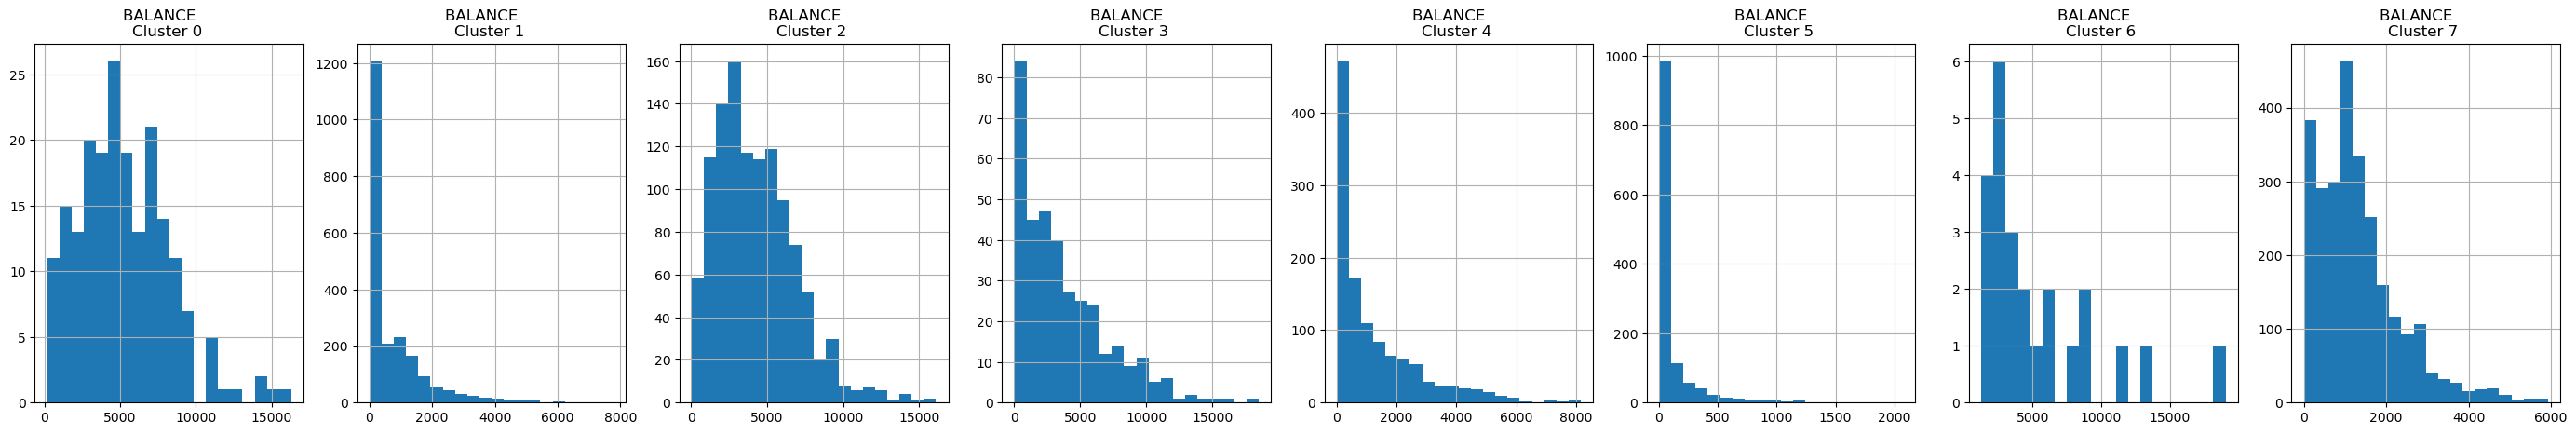

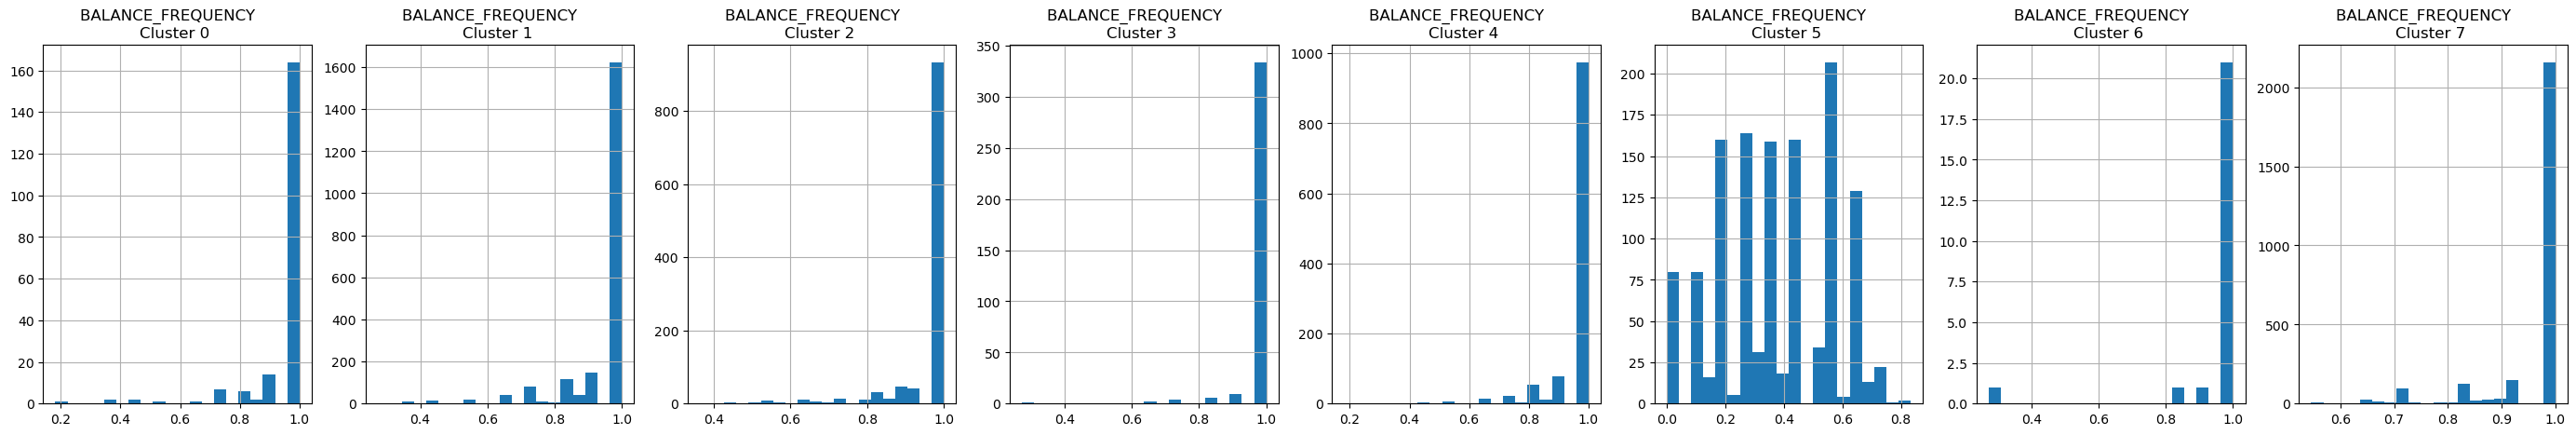

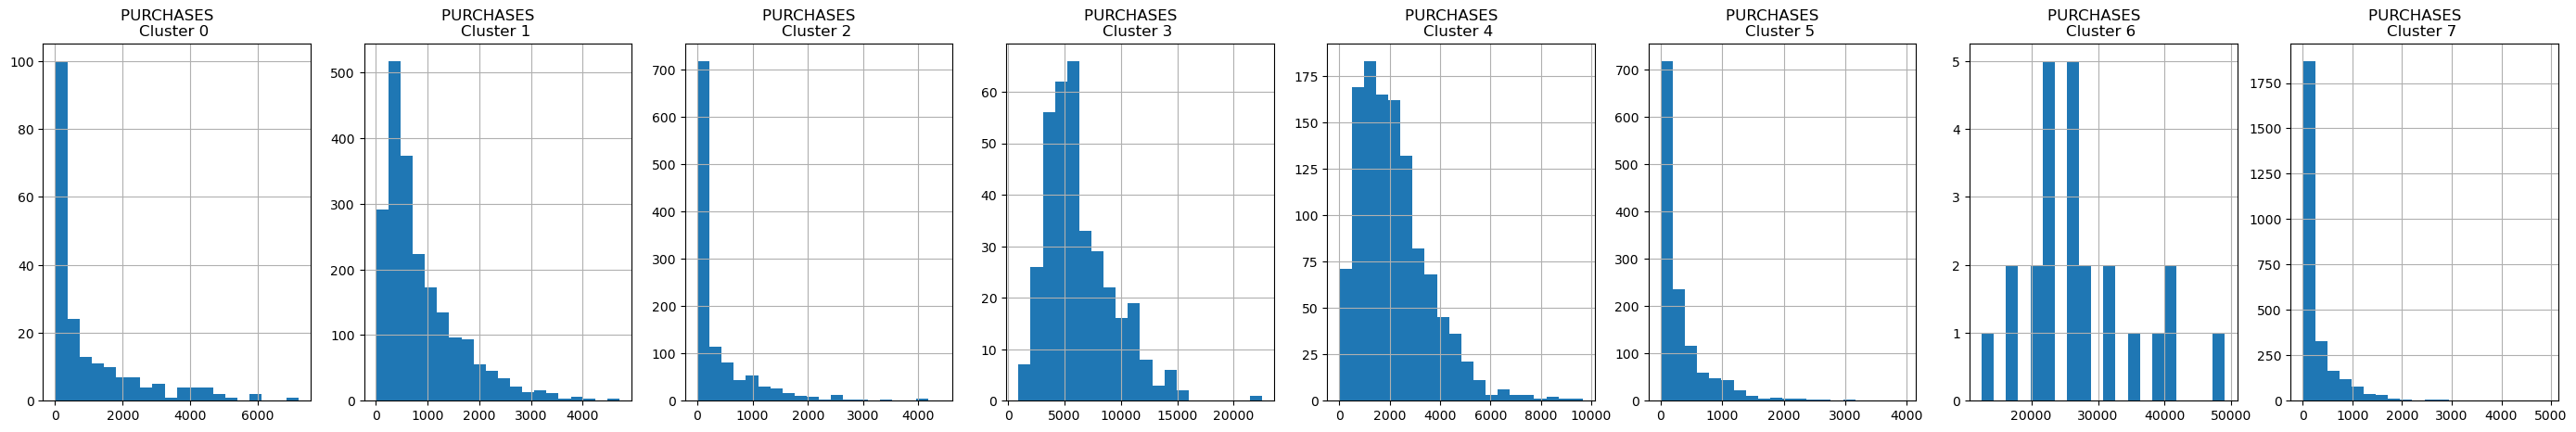

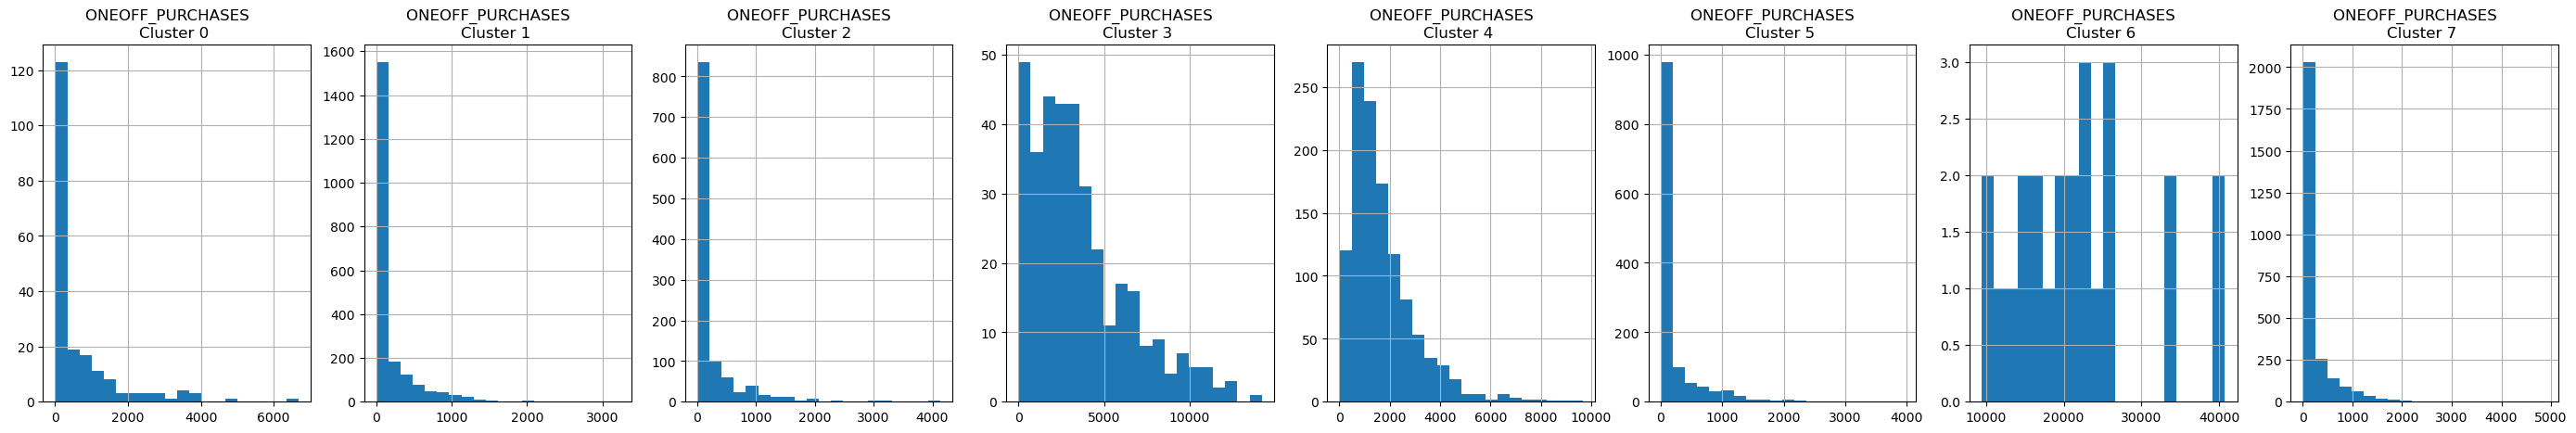

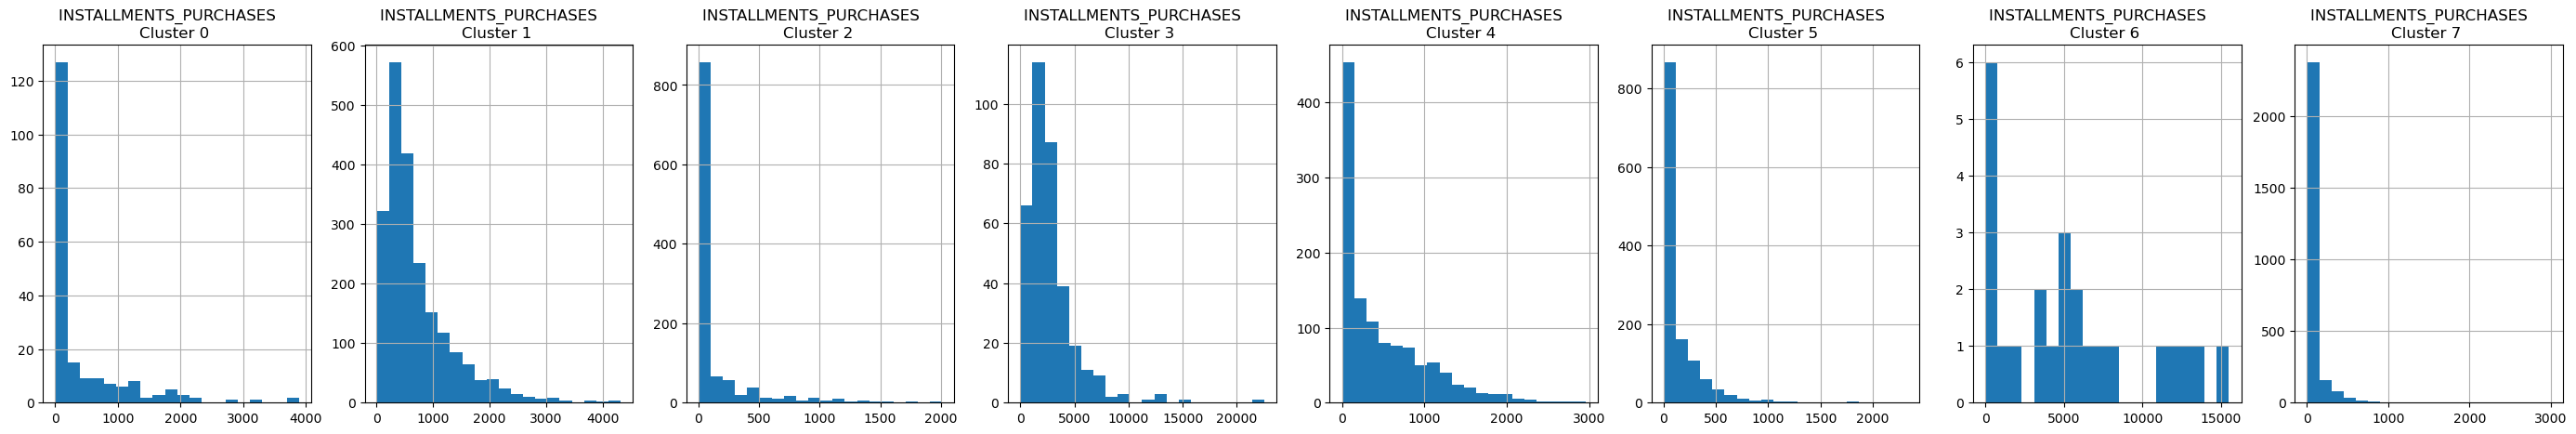

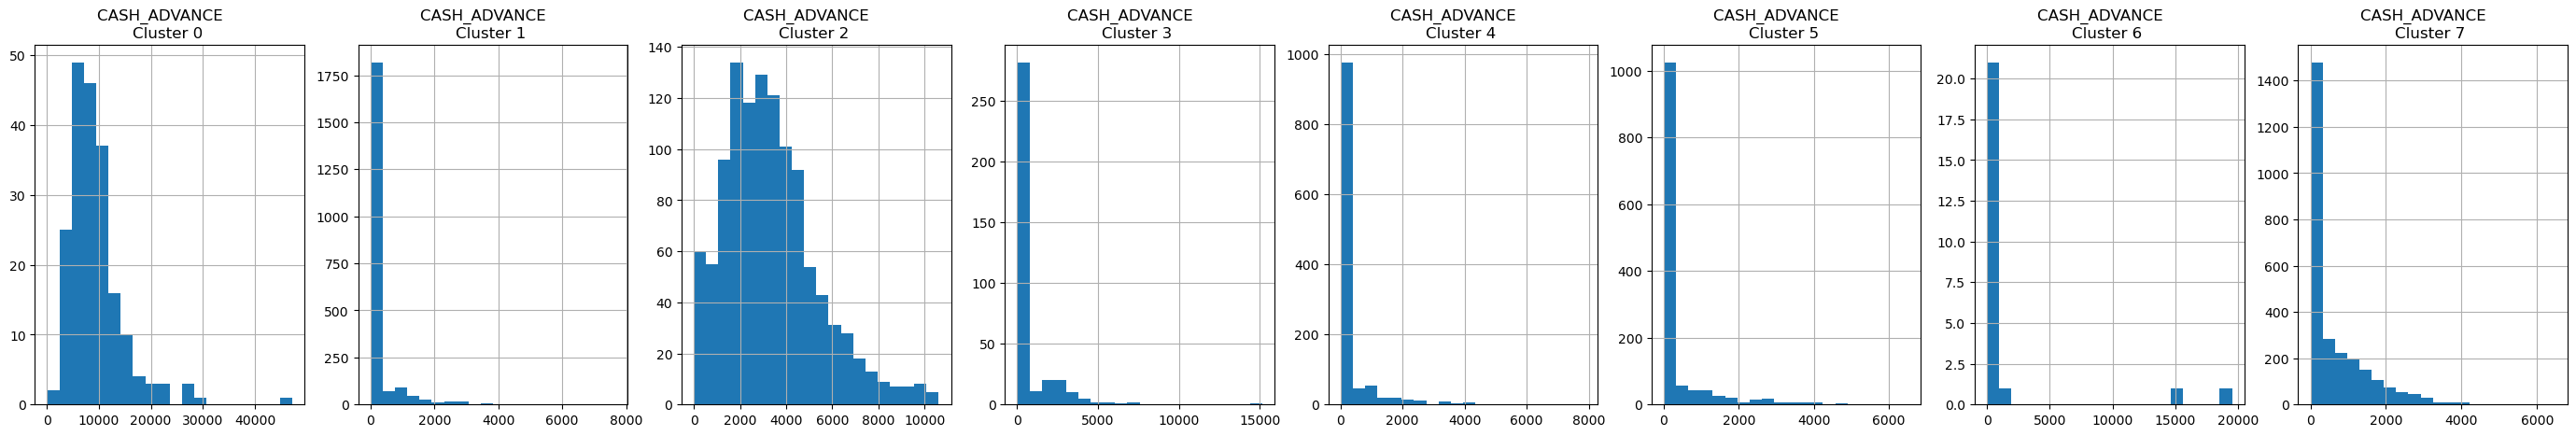

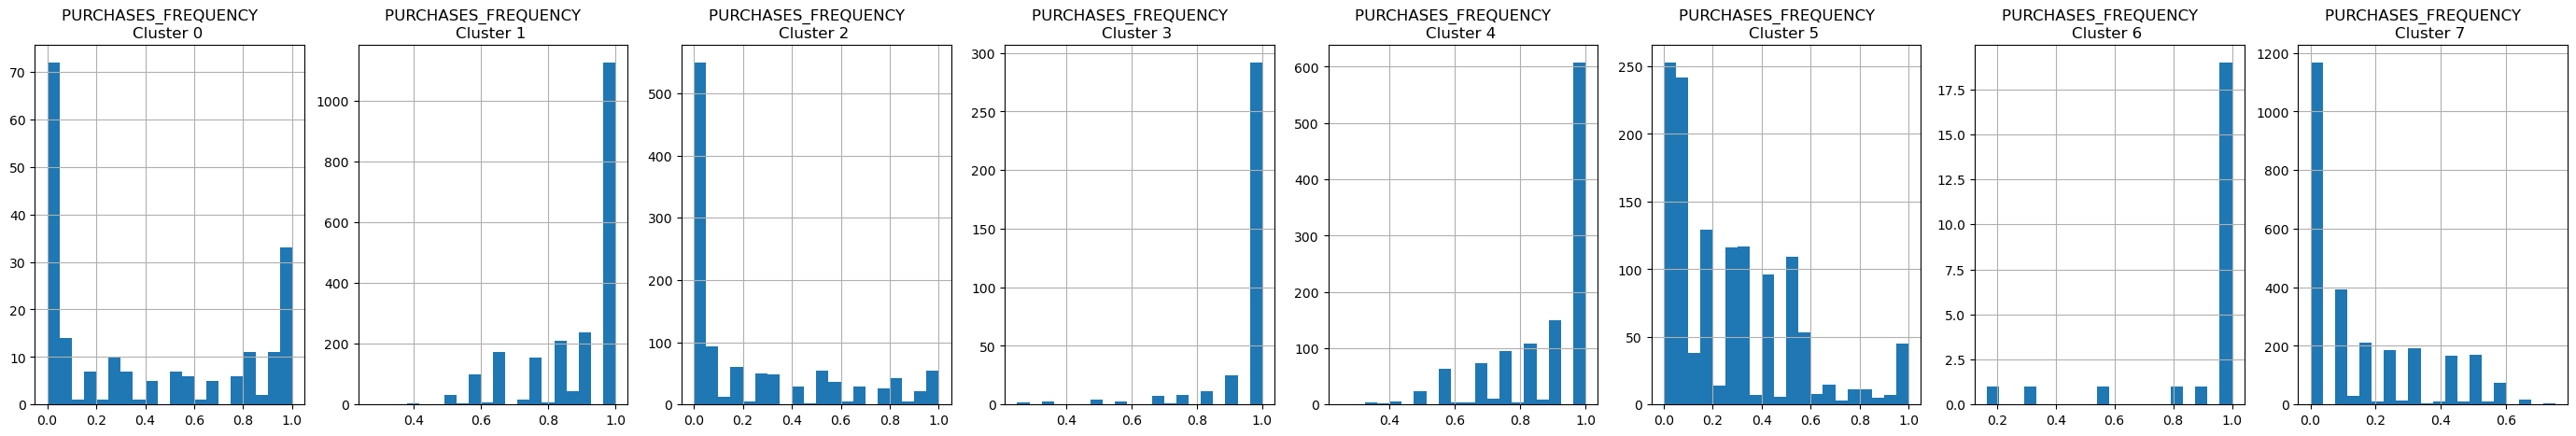

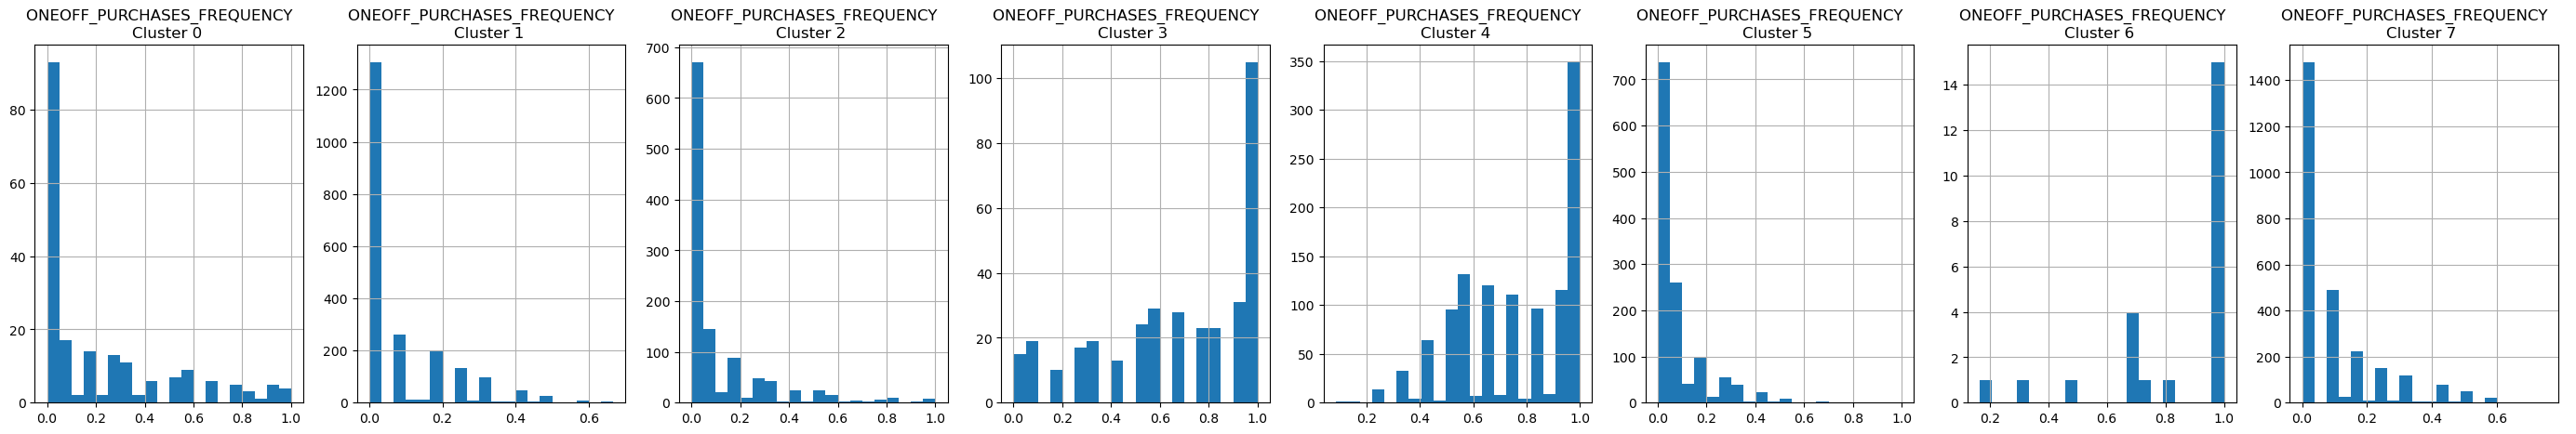

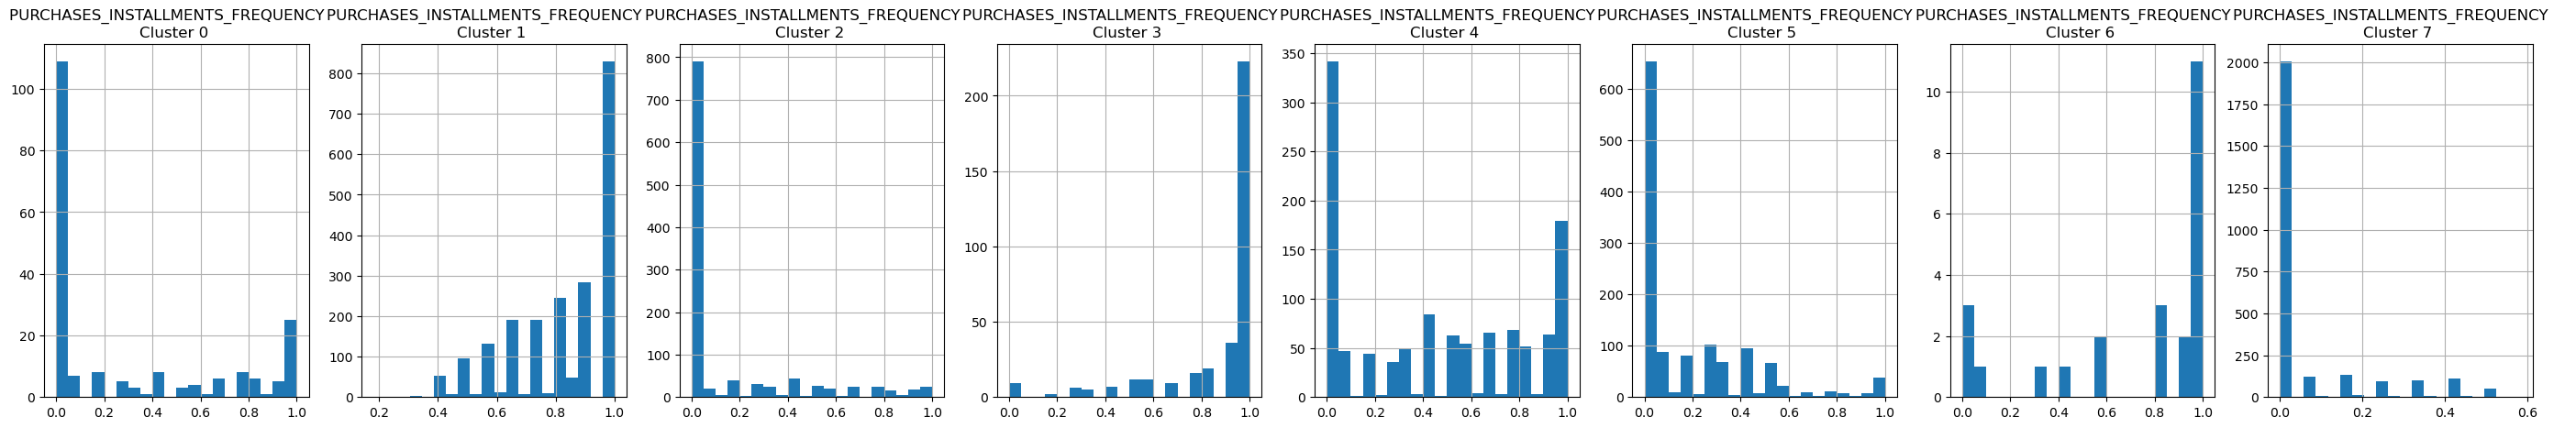

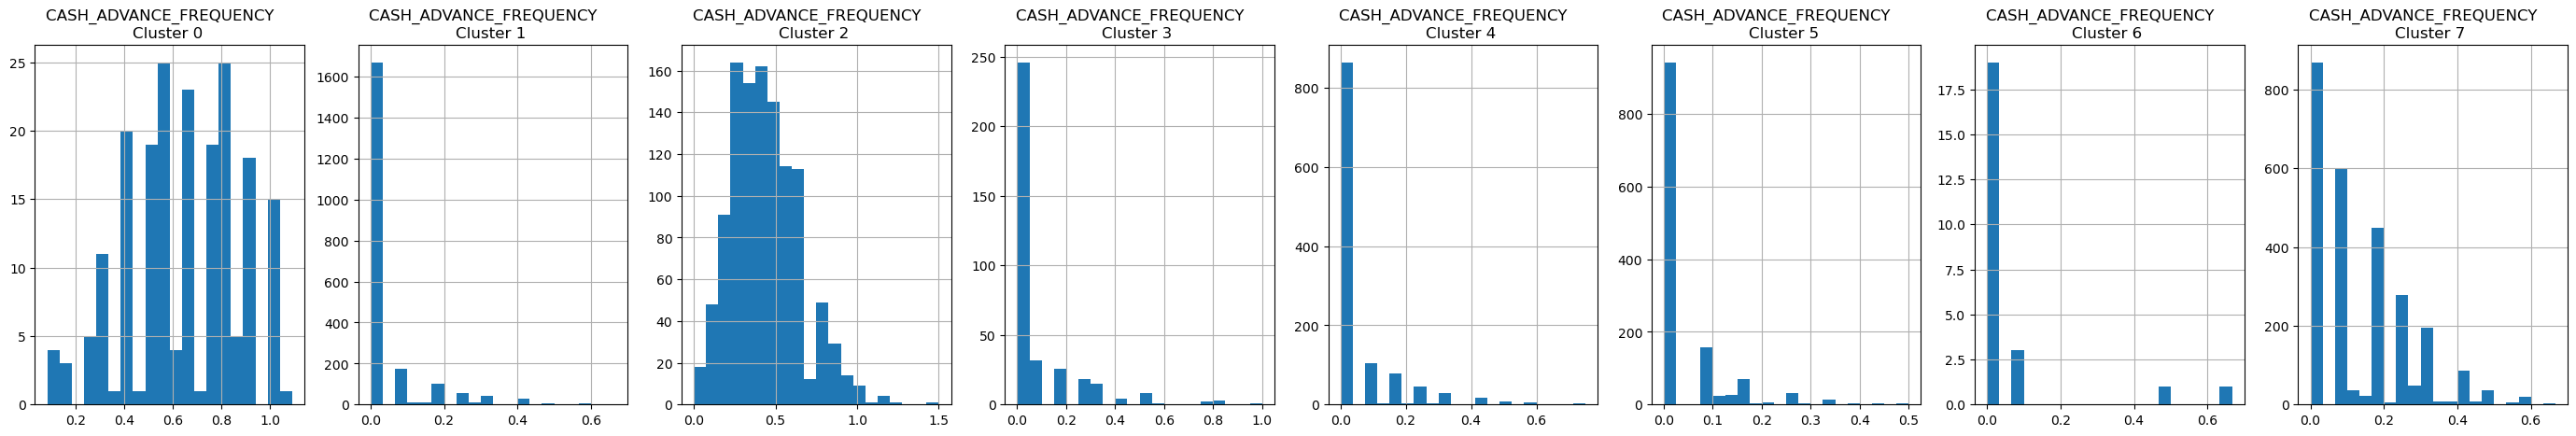

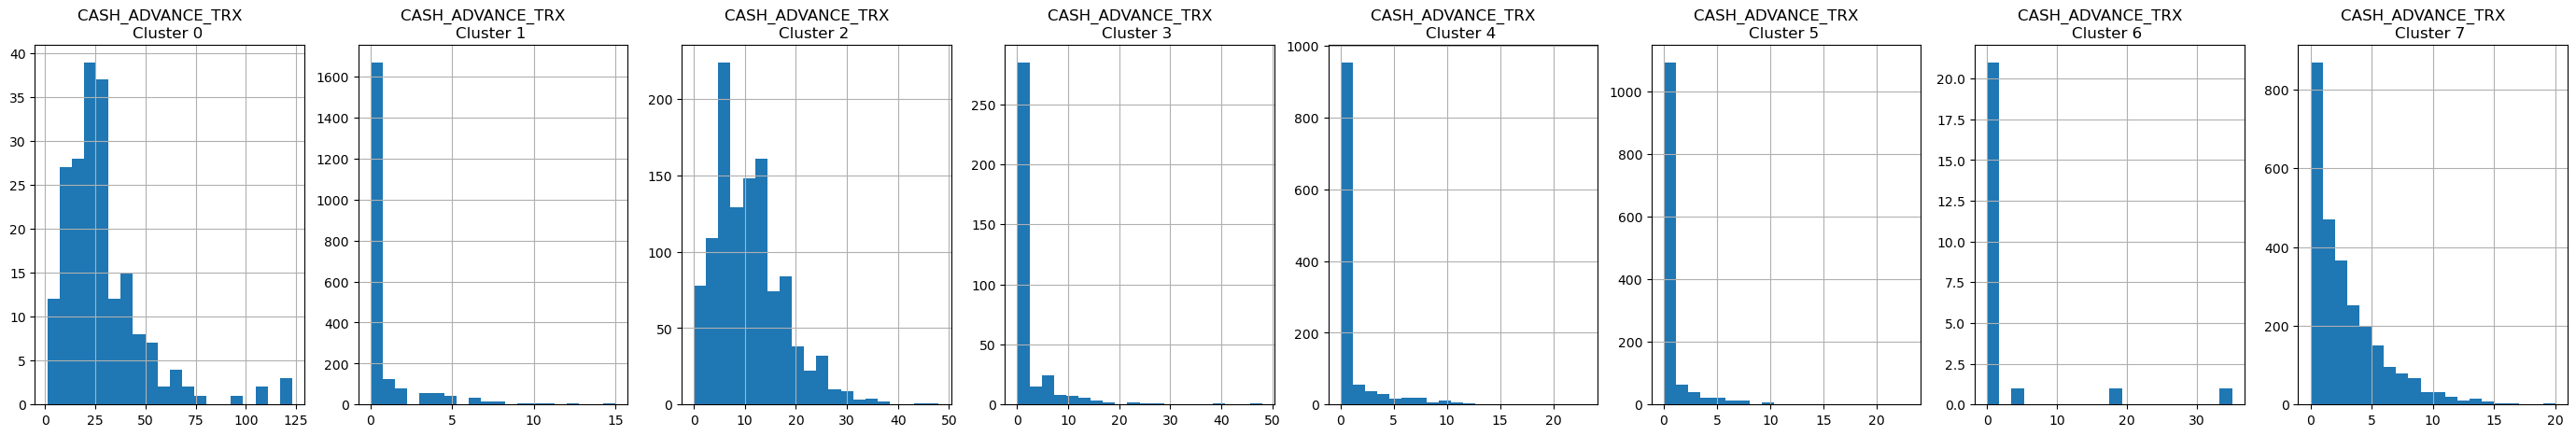

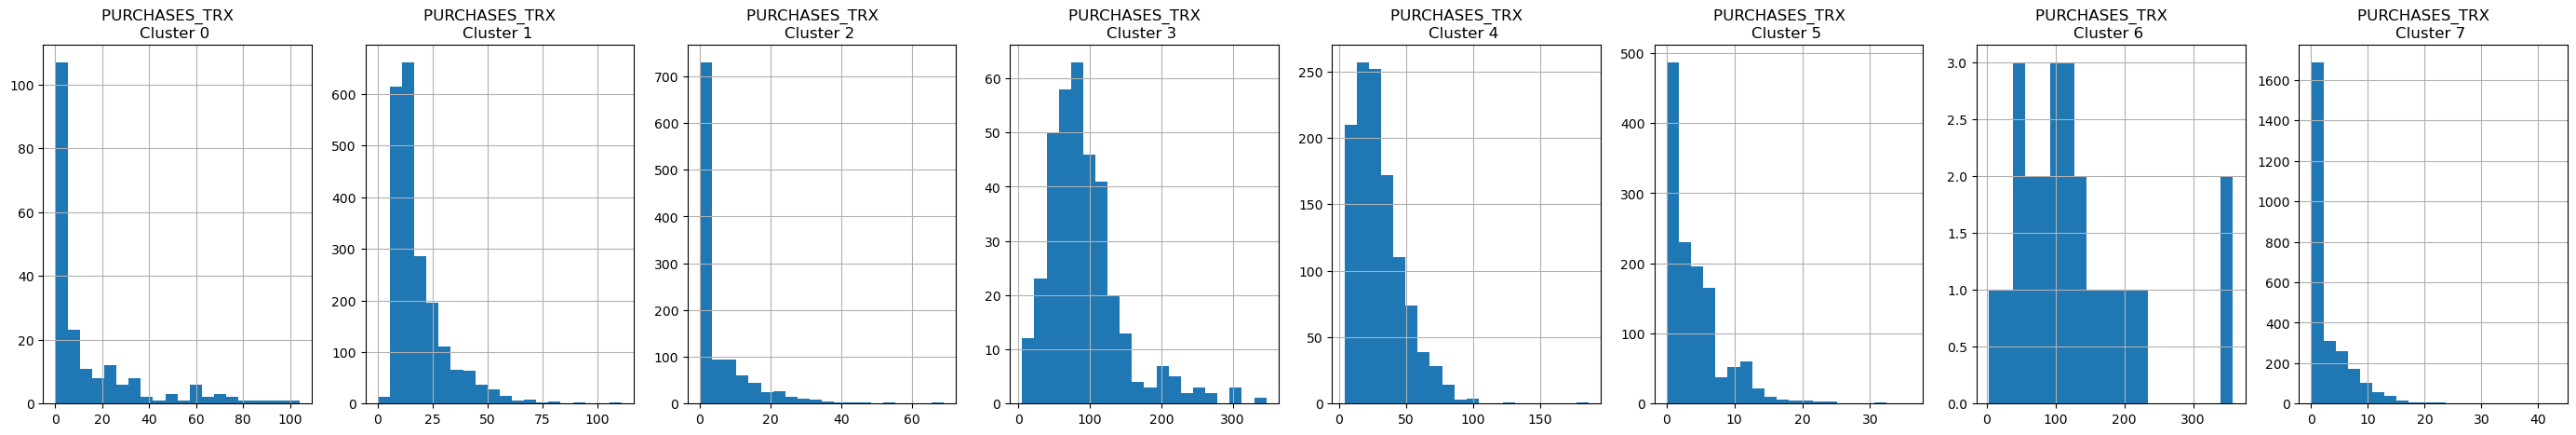

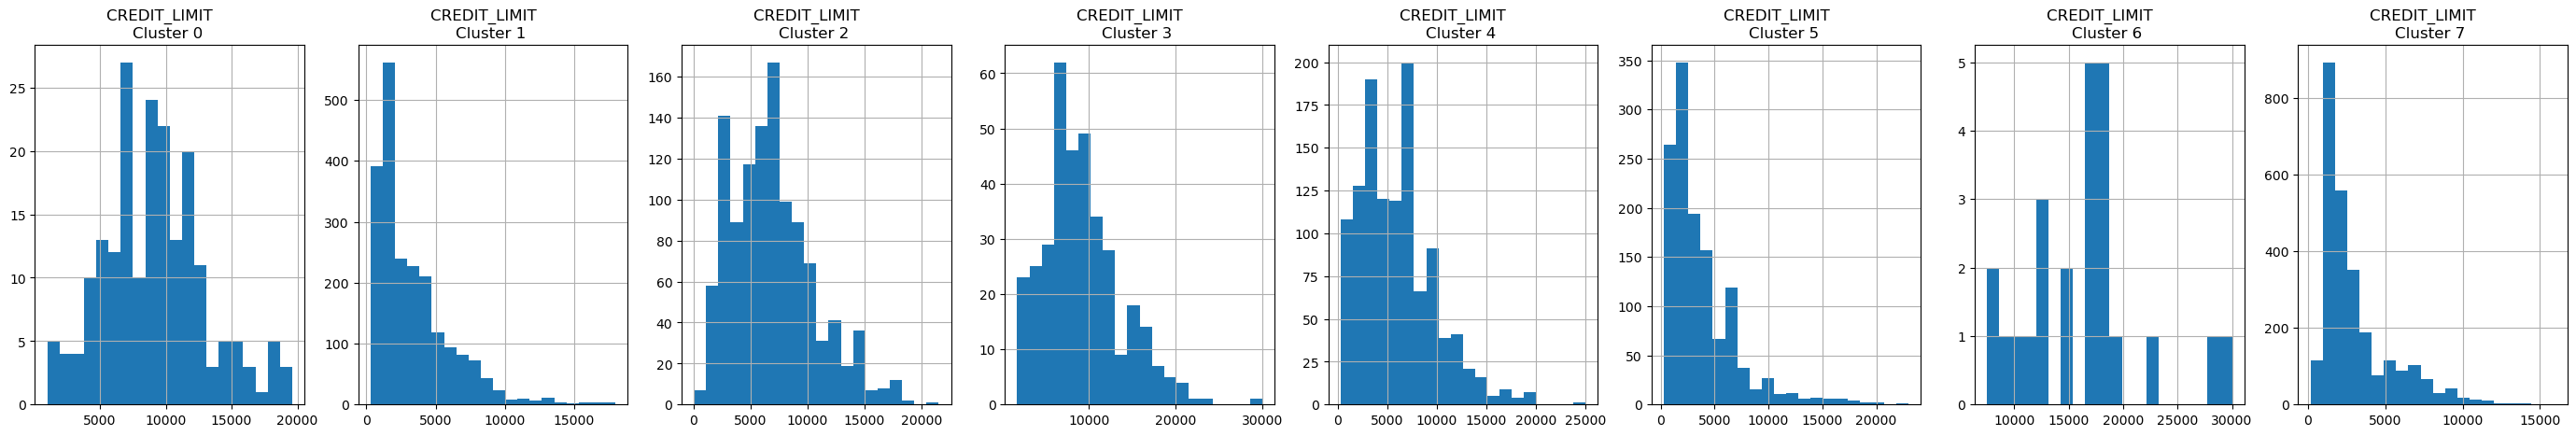

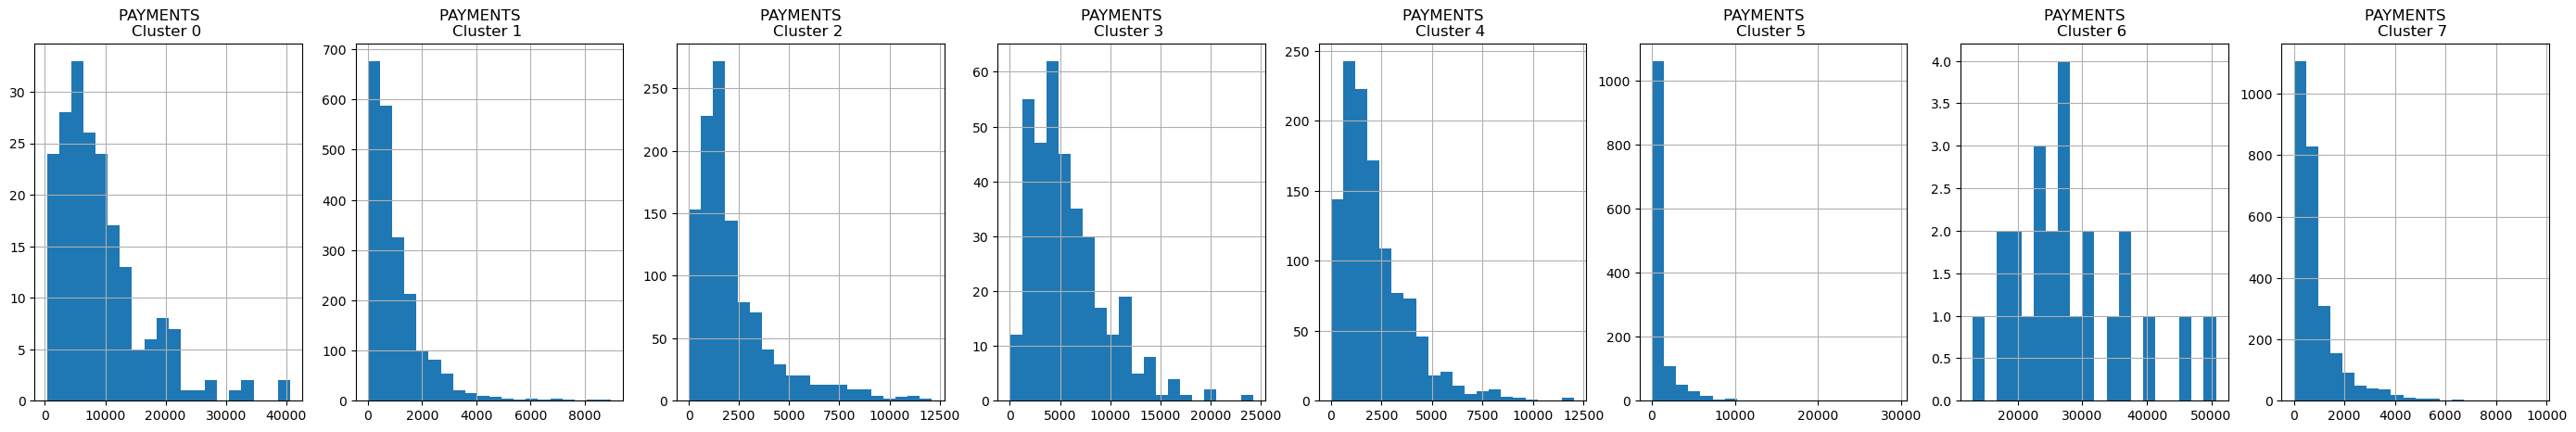

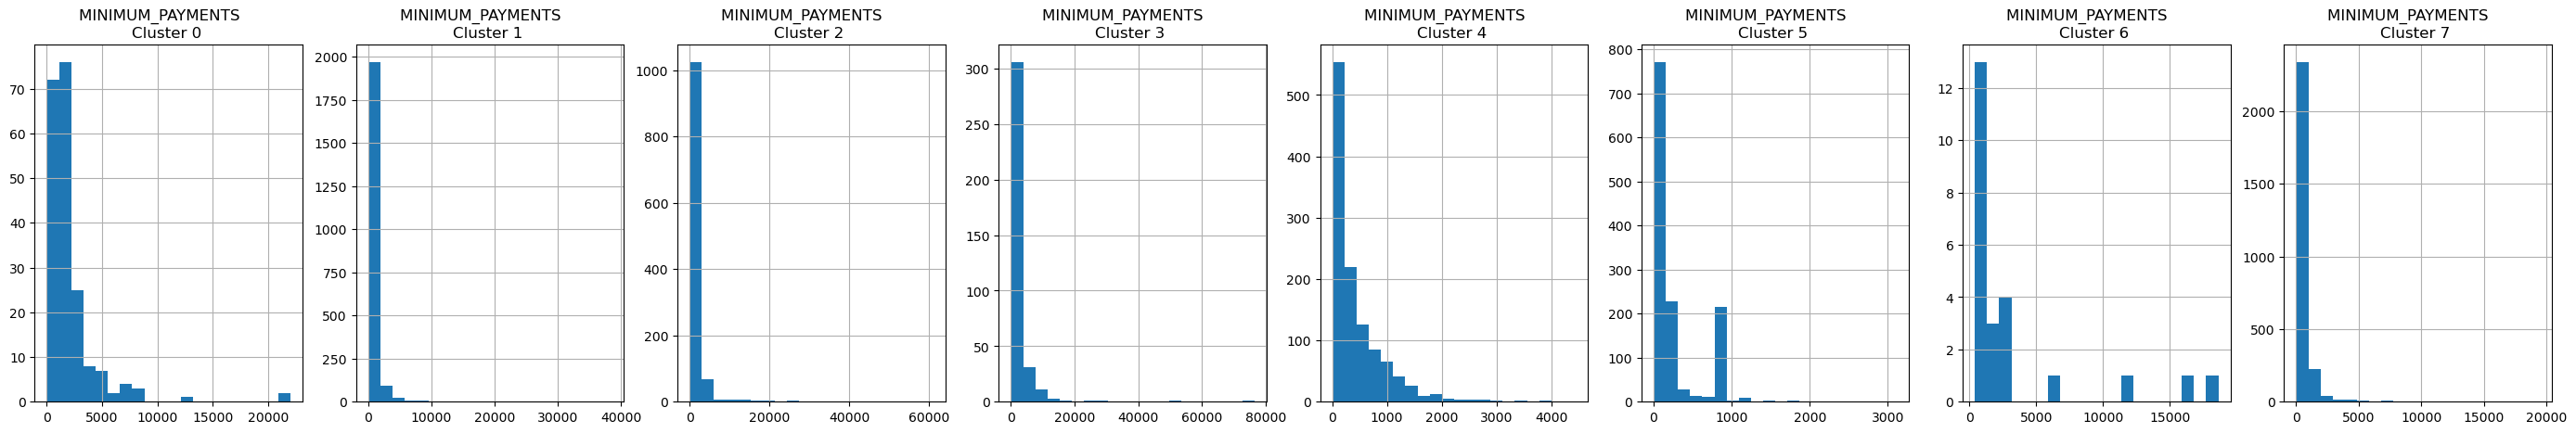

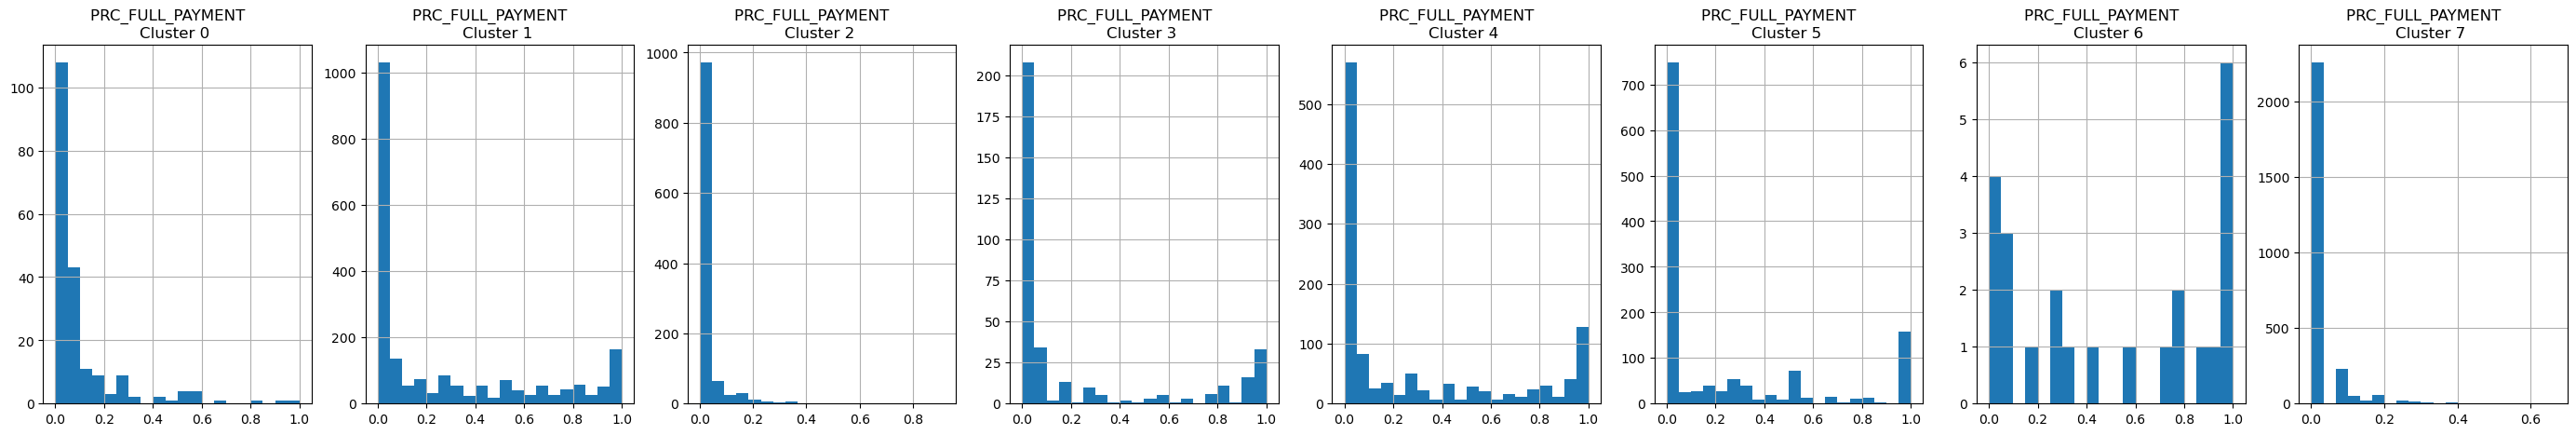

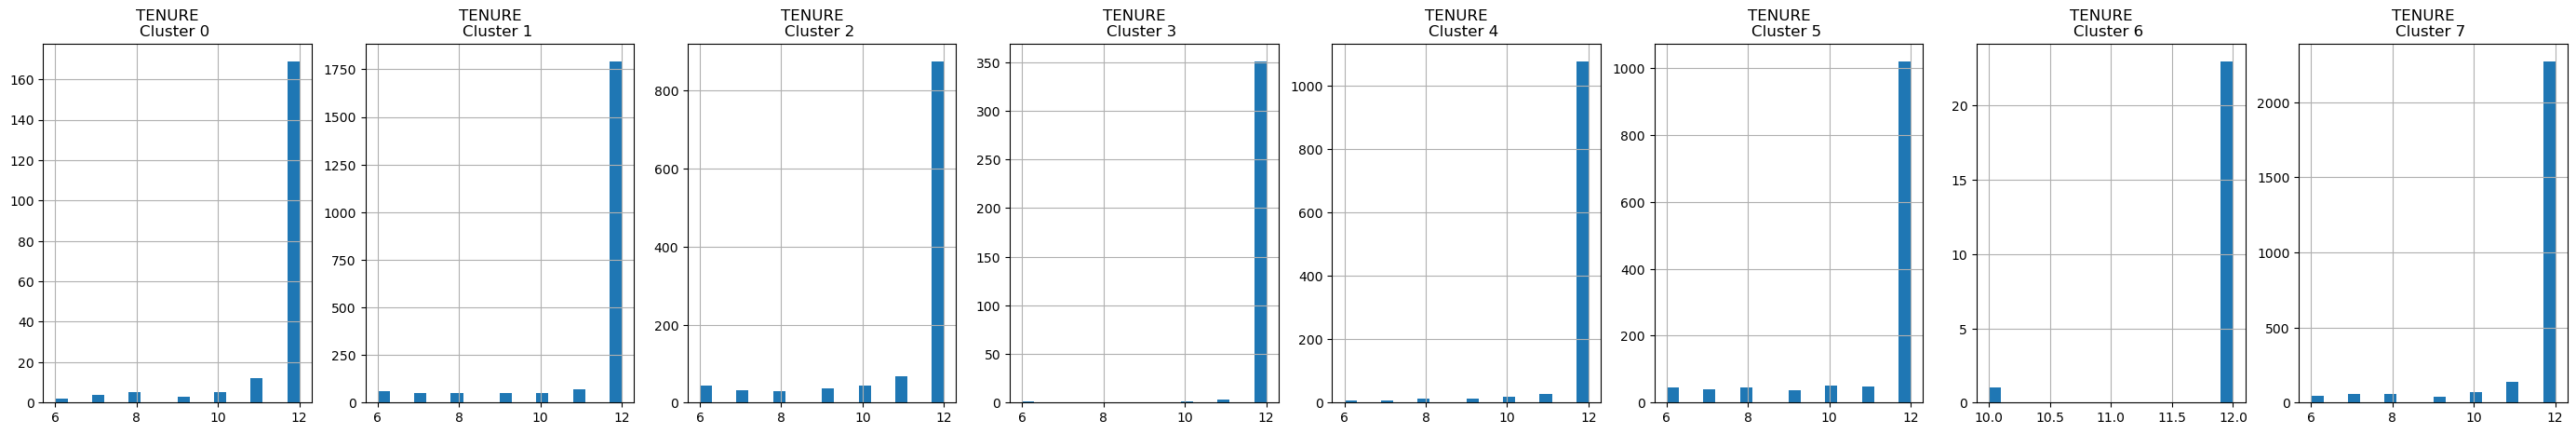

In [163]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# PRINCIPAL COMPONENT ANALYSIS

#### PCA with n components = 2

In [167]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
display(principal_comp)

array([[-1.68221837, -1.07644648],
       [-1.13828966,  2.50648923],
       [ 0.96967915, -0.38353139],
       ...,
       [-0.92620289, -1.81078444],
       [-2.33655178, -0.65796671],
       [-0.55642775, -0.40047939]])

#### Create a data frame with the two components

In [170]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682218 -1.076446
1 -1.138290  2.506489
2  0.969679 -0.383531
3 -0.873623  0.043177
4 -1.599433 -0.688580

#### Concatenate the clusters labels to the data frame

In [173]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
display(pca_df)

pca1      pca2  cluster
0    -1.682218 -1.076446        7
1    -1.138290  2.506489        2
2     0.969679 -0.383531        4
3    -0.873623  0.043177        7
4    -1.599433 -0.688580        7
...        ...       ...      ...
8945 -0.359629 -2.016145        1
8946 -0.564367 -1.639119        1
8947 -0.926203 -1.810784        1
8948 -2.336552 -0.657967        7
8949 -0.556428 -0.400479        5

[8950 rows x 3 columns]

#### Number of records in each cluster  

In [176]:
pca_df.value_counts(pca_df.cluster)

cluster
7    2673
1    2118
5    1285
4    1165
2    1129
3     356
0     200
6      24
Name: count, dtype: int64

#### Plot the graph with two components 

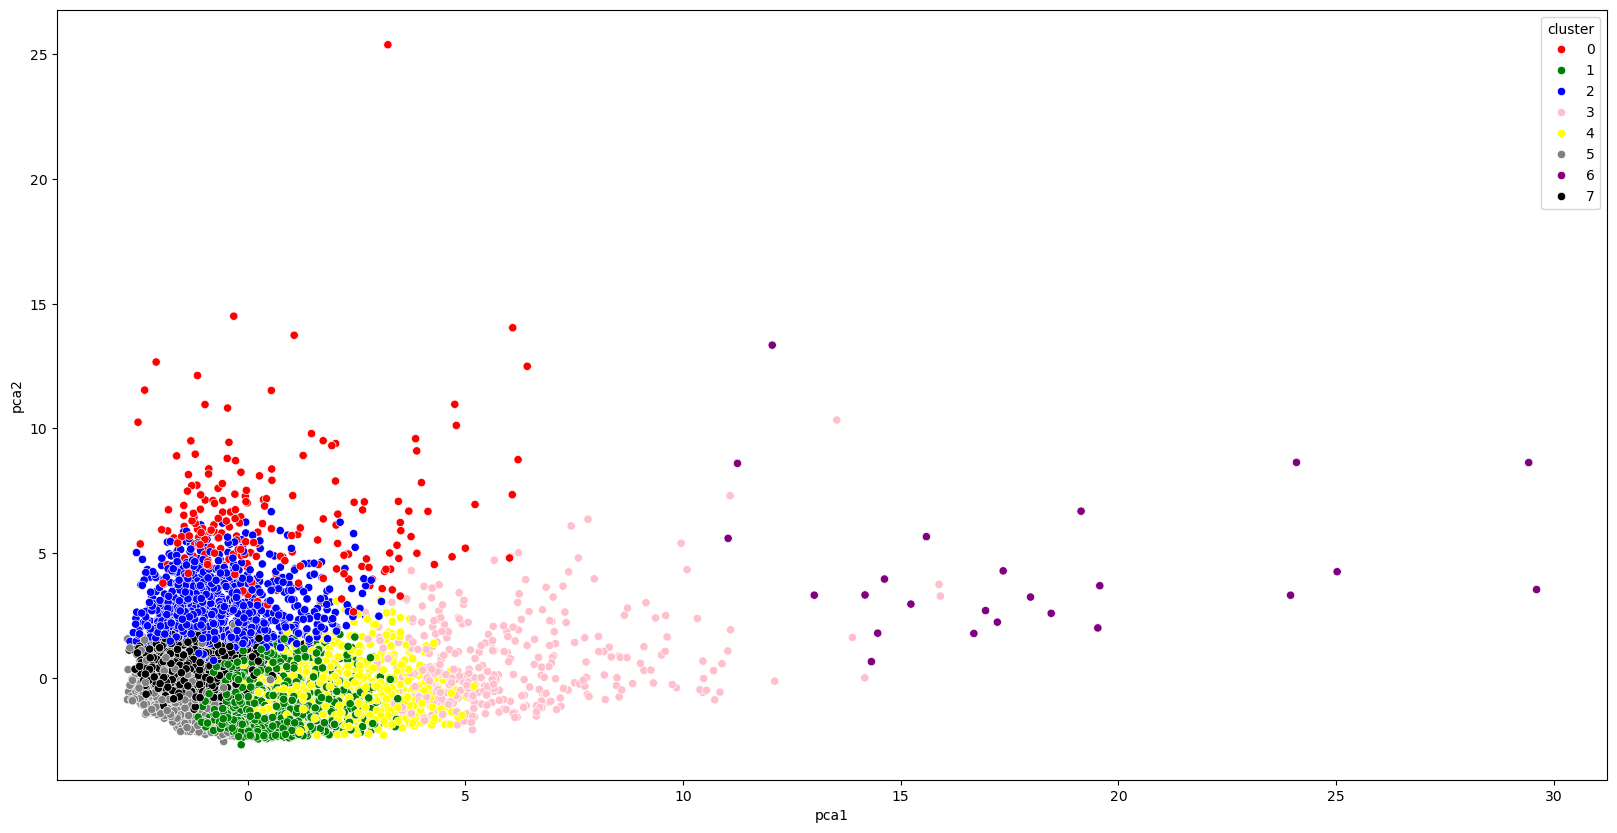

In [179]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# APPLY AUTO ENCODERS

#### Create the Layers 

In [183]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform  # This is normalizer
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,)) # 17 Features 

##### Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

In [188]:
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

#### Display the shape

In [191]:
display (creditcard_df_scaled.shape)

(8950, 17)

#### Create Auto Encoder – Fit model 

In [194]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.6545
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3298
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2369
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2259
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1887
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1569
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1423
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1305
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1251
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1070
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1033
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1051
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0928
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0850
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0717
Epoc

#### Auto Encoder Summary  

In [197]:
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 500)                 │           4,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2000)                │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │          20,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2000)                │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 17)                  │           8,517 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,922,961 (26.41 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,615,308 (17.61 MB)

#### Weights 

In [202]:
autoencoder.save_weights('autoencoder.weights.h5')

In [204]:
autoencoder.save('autoencoder.h5')

#### Generate autoencoder values.  

##### After auto encoder number of columns reduced to 10

In [208]:
pred = encoder.predict(creditcard_df_scaled)
display (pd.DataFrame(pred))

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0    1    2         3         4         5         6    7         8  \
0     0.0  0.0  0.0  0.037066  0.191707  0.324616  0.465456  0.0  0.394490   
1     0.0  0.0  0.0  2.230881  0.000000  2.631369  1.871308  0.0  1.453046   
2     0.0  0.0  0.0  1.259441  0.332312  0.954260  0.435126  0.0  0.320986   
3     0.0  0.0  0.0  0.380552  0.000000  1.314474  0.745245  0.0  0.008795   
4     0.0  0.0  0.0  0.059498  0.000000  0.415173  0.100673  0.0  0.460349   
...   ...  ...  ...       ...       ...       ...       ...  ...       ...   
8945  0.0  0.0  0.0  0.118176  2.308176  0.010043  3.067294  0.0  3.881373   
8946  0.0  0.0  0.0  0.256615  2.048022  0.229193  2.084975  0.0  4.304274   
8947  0.0  0.0  0.0  0.009294  1.443819  0.129969  2.827568  0.0  3.646092   
8948  0.0  0.0  0.0  0.440075  0.123756  0.148569  1.917120  0.0  3.119805   
8949  0.0  0.0  0.0  1.180920  0.000000  0.000000  1.942893  0.0  2.741195   

             9  
0     0.119604  
1     1.011917  
2     3.249662  
3     0.311423  
4     0.240789  
...        ...  
8945  2.505020  
8946  2.070004  
8947  1.652833  
8948  1.508825  
8949  3.063816  

[8950 rows x 10 columns]

#### Display Shape 

In [211]:
pred.shape

(8950, 10)

#### Create Elbow graph 

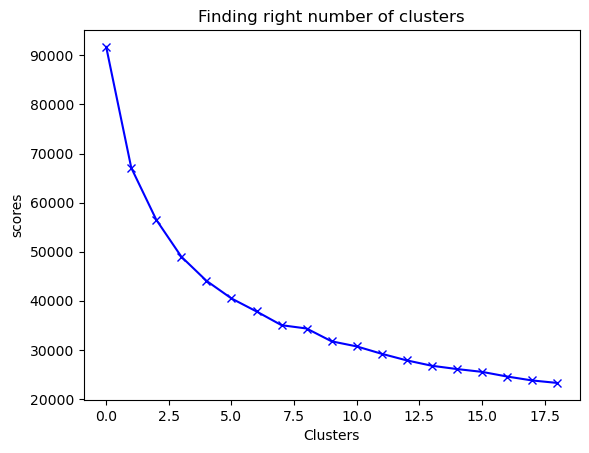

In [214]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

#### Display the graph, current and earlier wcss values   

##### Scores_1 – Earlier wcss values 
##### Scores_2 – Current wcss values

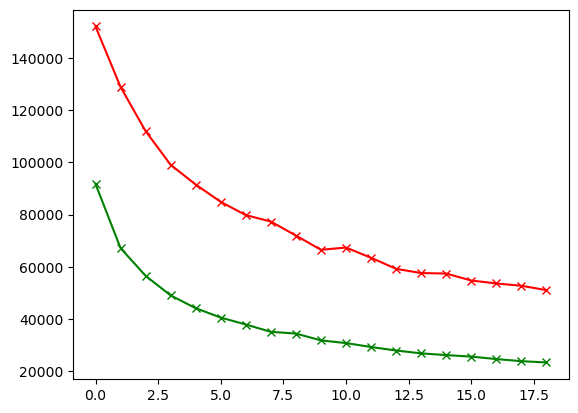

In [218]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

#### Create K Means Cluster with optimal number of clusters. In this case it is 4 clusters 

In [221]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

#### Display Cluster Details 

In [224]:
display(labels.shape) # Labels associated to each data point
display (labels.max())
display (labels.min())

(8950,)

3

0

#### Display individual cluster numbers 

In [227]:
y_kmeans = kmeans.fit_predict(pred)
display(y_kmeans)

array([1, 2, 0, ..., 0, 1, 0])

#### Concatenate Cluster number with Original Data Set 

In [230]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
display(df_cluster_dr.head())

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

#### Apply PCA on auto encoded data set 

In [233]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
display (pca_df.head())

pca1      pca2
0 -2.055305 -0.262110
1  0.919428  1.670050
2  0.471533 -0.146444
3 -1.388027 -0.047885
4 -2.114530 -0.081645

#### Concatenate Cluster number with PCA Data Set 

In [236]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -2.055305 -0.262110        0
1  0.919428  1.670050        1
2  0.471533 -0.146444        3
3 -1.388027 -0.047885        0
4 -2.114530 -0.081645        0

#### Print Clusters and number records in each cluster 

In [239]:
pca_df.value_counts(pca_df.cluster)

cluster
0    5585
3    2048
1    1166
2     151
Name: count, dtype: int64

#### Plot Graph

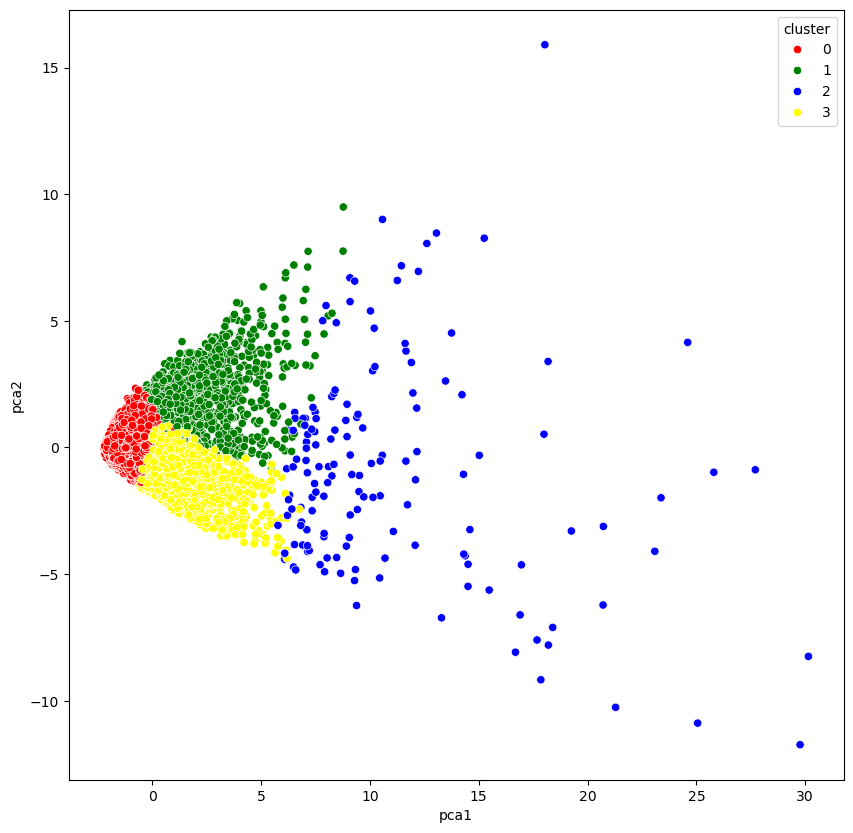

In [242]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

In [ ]:
##### By Prajwal Ghotkar